*Created by Petteri Nevavuori <<petteri.nevavuori@tuni.fi>>*

# Tehtävät

*Ott & Longnecker (2010): An Introduction to Statistics and Data Analysis*

<h1>Sisällysluettelo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5.41" data-toc-modified-id="5.41-1">5.41</a></span></li><li><span><a href="#5.49" data-toc-modified-id="5.49-2">5.49</a></span></li><li><span><a href="#6.36" data-toc-modified-id="6.36-3">6.36</a></span></li><li><span><a href="#7.23" data-toc-modified-id="7.23-4">7.23</a></span></li><li><span><a href="#8.06" data-toc-modified-id="8.06-5">8.06</a></span></li><li><span><a href="#9.12" data-toc-modified-id="9.12-6">9.12</a></span></li><li><span><a href="#10.06" data-toc-modified-id="10.06-7">10.06</a></span></li><li><span><a href="#11.01" data-toc-modified-id="11.01-8">11.01</a></span></li><li><span><a href="#12.08" data-toc-modified-id="12.08-9">12.08</a></span></li><li><span><a href="#13.08" data-toc-modified-id="13.08-10">13.08</a></span></li><li><span><a href="#14.7" data-toc-modified-id="14.7-11">14.7</a></span></li><li><span><a href="#15.04" data-toc-modified-id="15.04-12">15.04</a></span></li></ul></div>

## 5.41

A consumer testing agency wants to evaluate the claim made by a manufacturer of discount tires. The manufacturer claims that its tires can be driven at least 35,000 miles before wearing out. To determine the average number of miles that can be obtained from the manufacturer’s tires, the agency randomly selects 60 tires from the manufacturer’s warehouse and places the tires on 15 cars driven by test drivers on a 2-mile oval track. The number of miles driven (in thousands of miles) until the tires are determined to be worn out is given in the following table.

| Car          | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 | 13 | 14 | 15 |
|--------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Miles Driven | 25 | 27 | 35 | 42 | 28 | 37 | 40 | 31 | 29 | 33 | 30 | 26 | 31 | 28 | 30 |

$$n = 15$$
$$\bar{x} = 31.47$$ 
$$s = 5.04$$

**A. Place a 99% confidence interval on the average number of miles driven, m, prior to the tires wearing out.**

Vaikka meillä on käytössä jo näytteistä laskettuja tilastollisia suureita, aloitetaan silti visualisoimalla dataa karkealla histogrammilla.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
sns.set(style='dark')

samples = [25,27,35,42,28,37,40,31,29,33,30,26,31,28,30]
samples_count = len(samples)
samples_mean = 31.47
samples_std = 5.04

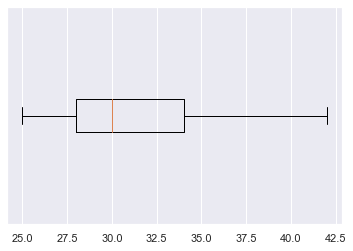

In [2]:
plt.boxplot(samples, vert=False)
plt.yticks([])
plt.grid()
plt.show()

Kuvaajamme ilmaisee näytteiden jakauman olevan ennemmin vino kuin normaalijakautunut. Siksi keskiarvon sijasta olisi perustellumpaa käyttää mediaania jatkotoimenpiteissä. 

> *Data voidaan olettaa olevan normaalijakautunut. Jos kuitenkin haluat analysoida sen myös mikäli tämä oletus ei pitäisi paikkansa, voi seurata kirjan esimerkkiä 5.20. Eli tässä tapauksessa CI:n arviointi toimii eri tavalla, ei niin että otetaan vaan väli mediaanin ympäriltä.*
>
>**Vastaus**: Mediaania ei siis yritetä käyttää.

Jatketaanpa siis luottamusvälin laskentaa. Ensin on vuorossa vapausasteiden määritys, jotta taulukosta saadaan luettua haluttuun luottamusarvoon liittyvä $t$-arvo.

$$ \text{df} = n - 1 = 14 $$

> *Kommentti: tässähän ei vielä testata mitään hypoteesia vaan arvioidaan keskiarvon luottamusväli. En ymmärrä miksi olet tässä käyttänyt yksipuolista analyysiä*
>
>**Vastaus**: Lasketaan siis vain luottamusväli kaksipuoleisella analyysillä. Kyseessä siis olikin estimointi hypoteesin testauksen sijasta.

Nollahypoteesin hylkäysalue on toisin sanoen jakauman oikeassa laidassa, jolloin kyseessä on yksipuolinen hypoteesin testaus. Kun $\alpha = 100\% - 99\% = 1\%$, niin

$$ t_{\alpha/2} = 2.977 $$

Kun $t$-arvo on tiedossa, lasketaan seuraavaksi luottamusvälin ala- ja ylärajat. Lasketaan ne *sekä keskiarvolla että mediaanilla*.

In [3]:
t = 2.977
interval_low = samples_mean-t*samples_std/np.sqrt(samples_count)
interval_high = samples_mean+t*samples_std/np.sqrt(samples_count)
(interval_low, interval_high)

(27.595963202322412, 35.34403679767758)

$$ \text{CI}^{\mu}_{99\%} \approx (27.596, 35.344) $$

Näytteiden keskiarvon luottamusväli jättää tavoitellun minimikeskiarvon (35) luottamusvälin sisäpuolelle.

**B. Is there significant evidence ($\alpha = .01$) that the manufacturer’s claim is false? What is the level of significance of your test? Interpret your findings.**

Seuraavaksi halutaan testatta varsinaiset hypoteesit. 

$$ \mu_0 = 35 $$
$$ H_0: \mu < \mu_0 $$
$$ H_a: \mu \ge \mu_0 $$

Koska meidän testimme ovat oikeahäntäisiä, on nollahypoteesin hylkäykselle perusteita, mikäli

$$ t_{comp.} \ge t_\alpha $$

Lasketaanpa siis seuraavaksi otoksen $t$-arvo erikseen sekä keskiarvolla että mediaanilla.

In [9]:
mu_0 = 35
samples_t = (samples_mean - mu_0)/(samples_std/np.sqrt(samples_count))
samples_t

-2.7126252404984497

$$ t_{\mu} \approx -2.713 \ll t_\alpha$$

Tämän tuloksen perusteella voidaan todeta, että datassa ei ole riittävästi todisteita valmistajan väitteen tueksi, eli nollahypoteesia ei voida hylätä. Tarkistetaan vielä testin tuloksen merkitsevyystaso

$$ p = P(t \ge t_{comp.}) = P(t \ge -2.173) $$

Tämän todennäköisyyden selvittämiseen hyödynnetään kirjan taulukkoa siten, että todennäköisyyttä haarukoidaan tehtävässä käytettyjen vapausasteita vastaavan $t$-arvorivin eri $\alpha$-arvoilla. Laskennallista $t$-arvoa lähin arvo on $t_{.40} = .258$. Koska taulukon $\alpha$-arvot ovat vain väliltä ``.40 ... .0005`` ja pienin $t$-arvo saadaan suurimmalla $\alpha$-arvolla, on

$$ p > 0.40 \gg \alpha $$

Nollahypoteesiä ei siis tule hylätä, jolloin valmistajan väitteelle ei ole tukea.

## 5.49

Refer to Exercise 5.41.

**A. Use a computer program to obtain 1000 bootstrap samples from the 15 tire wear data. Use there 1000 samples to obtain the bootstrap $p$-value for the $t$ test of $H_a: \mu < 35$.**

Tässä tehtävässä käytetään keskiarvoa, sillä tiedossa on jo, että mediaanilla laskettu $t$-arvo on keskiarvoakin pienempi.

> *Kommentti: Bootstrap menetelmä ei edellytä normaalijakautuneisuutta, joten tämä perustelu on ainakin turha ellei väärä. Muuten ratkaisu on ok*
>
>**Vastaus**: Perustelu nojasi todennäköisesti ajatukseen ei-normaalijakautuneesta populaatiosta. Koska normaalijakautuneisuus voitiin olettaa, tähän perusteluun ei ole tarvetta päätyä (luku 5.9 alku).

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
sns.set(style='dark')

samples = [25,27,35,42,28,37,40,31,29,33,30,26,31,28,30]
samples_count = len(samples)
samples_mean = 31.47
samples_std = 5.04

bootstrap_samplings = 1000
calculate_t = lambda mean, std: (mean - samples_mean)/(std/np.sqrt(samples_count))
bootstrapped_ts = []

for i in range(bootstrap_samplings):
    bs_samples = [samples[np.random.randint(samples_count)] for i in range(samples_count)]
    bs_t = calculate_t(np.mean(bs_samples), np.std(bs_samples))
    bootstrapped_ts.append(bs_t)

Visualisoidaanpa näin tuotetut $t$-arvot.

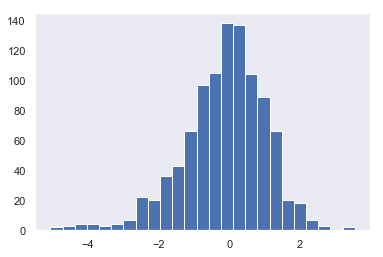

In [113]:
plt.hist(bootstrapped_ts, bins=25)
plt.show()

Arvot ovat melko normaalijakautuneen näköisiä. Seuraavaksi arvot järjestetään ja otetaan tehtävänannon mukaisesti 99 % luottamusvälin laskentaan vaaditut $t$-arvot.

In [37]:
t_low = sorted(bootstrapped_ts)[int(bootstrap_samplings*(0.005))]
t_high = sorted(bootstrapped_ts)[int(bootstrap_samplings*(0.995))]
print((t_low,t_high))

(-4.830833519514148, 2.275607764210186)


$$\hat{t}_{0.005} \approx -4.831$$
$$\hat{t}_{0.995} \approx 2.276$$


Käyttämällä alkuperäisten näytteiden keskiarvoa ja keskihajontaa lasketaan likimääräisen luottamusvälin ala- ja ylärajat.

In [38]:
interval_low = samples_mean+(t_low*samples_std/np.sqrt(samples_count))
interval_high = samples_mean+(t_high*samples_std/np.sqrt(samples_count))
(interval_low, interval_high)

(25.1835281094887, 34.43129936702421)

$$ \text{CI}^{\mu}_{99\%} \approx (25.184, 34.431) \text{, kun } \alpha = .01 $$

Luottamusvälin yläraja jää arvon 35 alle. Tämän jälkeen lasketaan niiden bootstrap-menetelmällä laskettujen $t$-arvojen osuus kaikista arvoista, joiden arvo on vähintään yhtä suuri kuin näytteistä laskettu $t$-arvo. Olkoot arvot ylittävien määrä $m$ ja kaikkien näytteistettyjen arvojen määr $B$, jolloin bootstrap-menetelmällä 

$$ p = \frac{m}{B} $$

In [48]:
m = len([t for t in bootstrapped_ts if t >= samples_t])
p = m / bootstrap_samplings
p

0.965

$$ p = \frac{m}{B} = 0.965 = 96.5 \% $$

**B. Compare the $p$-value from part (a) to the $p$-value obtained in Exercise 5.41.**

Harjoituksen 5.41 $p$-arvo jäi arvoitukseksi, sillä taulukosta haarukoiden ei loppujen lopuksi edes riittävän lähelle menevää $t$-arvoa ollut löydettävissä. Bootstrap-menetelmällä laskettu merkitsevyystaso taas antaa kuvan, että renkaan valmistaja on auttamattomasti luvannut liikoja.

## 6.36

The effect of Benzedrine on the heart rate of dogs (in beats per minute) was examined in an experiment on 14 dogs chosen for the study. Each dog was to serve as its own control, with half of the dogs assigned to receive Benzedrine during the first study period and the other half assigned to receive a placebo (saline solution). All dogs were examined to determine the heart rates after
2 hours on the medication. After 2 weeks in which no medication was given, the regimens for the dogs were switched for the second study period. The dogs previously on Benzedrinewere given the placebo and the others received Benzedrine. Again heart rates were measured after 2 hours. 

The following sample data are not arranged in the order in which they were taken but have been summarized by regimen. Use these data to test the research hypothesis that the distribution of heart rates for the dogs when receiving Benzedrine is shifted to the right of that for the same animals when on the placebo. Use a one-tailed Wilcoxon signed-rank test with $\alpha = .05$.

| Dog        | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  | 11  | 12  | 13  | 14  |
|------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Placebo    | 250 | 271 | 243 | 252 | 266 | 272 | 293 | 296 | 301 | 298 | 310 | 286 | 306 | 309 |
| Benzedrine | 258 | 285 | 245 | 250 | 268 | 278 | 280 | 305 | 319 | 308 | 320 | 293 | 305 | 313 |

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set(style='dark')

placebo = [250,271,243,252,266,272,293,296,301,298,310,286,306,309]
benzedrine = [258,285,245,250,268,278,280,305,319,308,320,293,305,313]

Aloitetaan ensin visualisoimalla datat päällekkäisillä histogrammeilla.

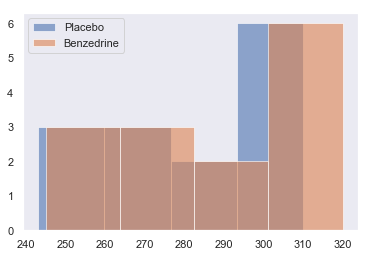

In [12]:
plt.hist(placebo,bins=4,alpha=0.6,label='Placebo')
plt.hist(benzedrine,bins=4,alpha=0.6,label='Benzedrine')
plt.legend()
plt.show()

Kuvasta ainakin karkeasti näyttää siltä, että jotain eroa näytteissä on. Koska Wilcoxonin testi keskittyy eroihin, lasketaanpa vielä näytteiden erot ja piirretään erojen histogrammit. Erotus lasketaan siten, että ``placebo``-arvoista vähennetään ``benzedrine``-arvot.

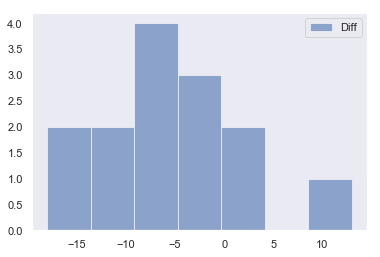

In [31]:
diffs = [p-b for p,b in zip(placebo, benzedrine)]
plt.hist(diffs,bins=7,alpha=0.6,label='Diff')
plt.legend()
plt.show()

Erotukset näyttävät jokseenkin normaalijakatuneilta. Samoin näyttää vahvasti siltä, että ``benzedrine``-arvot ovat pääsääntöisesti ``placebo``-arvoja suurempia, sillä erotukset näyttävät olevan ennemmin negatiivisella puolella. Järjestetään erotukset seuraavaksi absoluuttisen suuruden mukaiseen järjestykseen. Samalla otetaan talteen kunkin erotuksen merkki ja lasketaan absoluuttisten erotusten sijoitukset jaetut sijat huomioiden.

In [58]:
df = pd.DataFrame(diffs,columns=['Diff'])
df['SignPos'] = df['Diff'] >= 0
df['AbsDiff'] = df['Diff'].abs()
df['Rank'] = 0
df = df.sort_values(by='AbsDiff')

rank = 1
for abs_diff in df['AbsDiff'].unique():
    values = df[df['AbsDiff'] == abs_diff]
    count = values.shape[0]
    fraction = 0 if count == 1 else (1 / count)
    df.loc[values.index, 'Rank'] = rank + fraction
    rank += count
df

,Diff,SignPos,AbsDiff,Rank
12,1,True,1,1.000000
2,-2,False,2,2.333333
3,2,True,2,2.333333
4,-2,False,2,2.333333
13,-4,False,4,5.000000
5,-6,False,6,6.000000
11,-7,False,7,7.000000
0,-8,False,8,8.000000
7,-9,False,9,9.000000
9,-10,False,10,10.500000


Seuraavaksi on vuorossa sekä negatiivisten että positiivisten sijoitusten yhteenlasku.

In [61]:
t_minus = df.loc[:,'Rank'][df['SignPos'] == False].sum()
t_plus = df.loc[:,'Rank'][df['SignPos'] == True].sum()
t_minus,t_plus

(87.66666666666667, 15.333333333333334)

$$T_{\text{-}} \approx 87.7 $$
$$T_{\text{+}} \approx 15.3 \rightarrow T $$

Tehtävänantona oli suorittaa yksipuolinen Wilcoxonin sign-rank-testi. Tehtävän hypoteesit ovat

$$H_0: \text{Benzedriini ei nosta sykettä}$$
$$H_a: \text{Benzedriini nostaa sykettä}$$

Kun tiedossa on, että positiivisia sijoituksia oli negatiivisia vähemmän, tarkastetaan seuraavaksi määritellyn $\alpha$-arvon mukainen merkitsevyystaso kirjan taulukosta. Taulukosta etsitään $p=.05$ ja $n=14$ vastaava raja. Mikäli $T$ on pienempi tai yhtäsuuri kuin raja-arvo, $H_0$ tulee hylätä.

$$\text{Kriittinen raja-arvo} = 25 > T \rightarrow H_0 \text{ hylätään}$$

Benzedriini toisinsanoen nostaa sykettä.

## 7.23

A consumer-protection magazine was interested in comparing tires purchased from two different companies that each claimed their tires would last 40,000 miles. A random sample of 10 tires of each brand was obtained and tested under simulated road conditions. The number of miles until the tread thickness reached a specified depth was recorded for all tires. The data are
given next (in 1,000 miles).

| Brand I  | 38.9 | 39.7 | 42.3 | 39.5 | 39.6 | 35.6 | 36.0 | 39.2 | 37.6 | 39.5 |
|----------|------|------|------|------|------|------|------|------|------|------|
| Brand II | 44.6 | 46.9 | 48.7 | 41.5 | 37.5 | 33.1 | 43.4 | 36.5 | 32.5 | 42.0 |

**A. Plot the data and compare the distributions of longevity for the two brands.**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')
pd.options.display.float_format = '{:.3f}'.format

brand_1 = [38.9,39.7,42.3,39.5,39.6,35.6,36.0,39.2,37.6,39.5]
brand_2 = [44.6,46.9,48.7,41.5,37.5,33.1,43.4,36.5,32.5,42.0]

Ensimmäisessä tehtävässä tulee visualisoida näytteitä ja niiden jakaumia. Aloitetaan tilastollisilla tunnusluvuilla.

In [8]:
df = pd.DataFrame()
df['Brand 1'] = brand_1
df['Brand 2'] = brand_2
df.describe()

,Brand 1,Brand 2
count,10.000,10.000
mean,38.790,40.670
std,1.954,5.579
min,35.600,32.500
25%,37.925,36.750
50%,39.350,41.750
75%,39.575,44.300
max,42.300,48.700


Eli toisin ilmaistuna:

$$\bar{x}_1 = 38.790 \hspace{0.5cm}\text{ja}\hspace{0.5cm} s_1 = 1.954$$
$$\bar{x}_2 = 40.670 \hspace{0.5cm}\text{ja}\hspace{0.5cm} s_2 = 5.579$$

Jatketaanpa histogrammeilla.

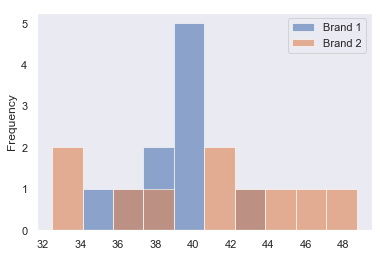

In [9]:
df.plot.hist(alpha=0.6)
plt.show()

Kakkosbrändillä näyttäisi olevan enemmän hajontaa ykkösbrändiin nähden. Piirretäänpä vielä laatikkojanakuvaajat.

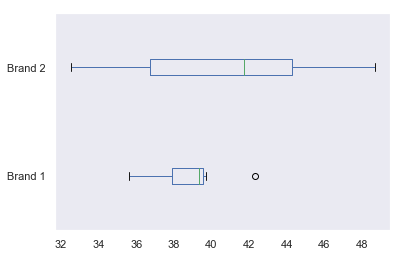

In [10]:
df.plot.box(vert=False)
plt.show()

Samoin on laita myös laatikkojanakuvaajien mukaan. Vaikka ensimmäisen brändin kohdalla yksi arvoista jää poikkeavaksi, silmämääräisesti sen kuuluminen viiksen sisään näyttäisi olevan kuitenkin aika pienestä kiinni. 

Tämän lisäksi meitä kiinnostaa myös se, että onko brändikohtaiset näytteet normaalijakautuneita vai ei. Tuotetaan tätä varten vielä normaalijakaumakuvaajat.

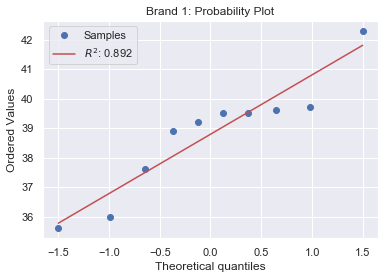

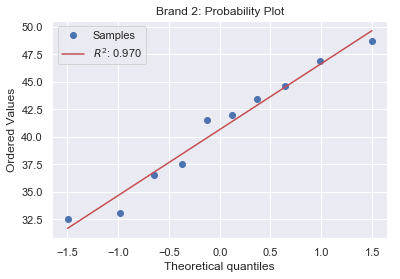

In [25]:
_,stats = scipy.stats.probplot(brand_1,plot=plt,)
plt.title("Brand 1: Probability Plot")
plt.gca().legend(("Samples",f"$R^2$: {stats[-1]**2:.3f}"))
plt.grid()
plt.show()
_,stats = scipy.stats.probplot(brand_2,plot=plt)
plt.title("Brand 2: Probability Plot")
plt.gca().legend(("Samples",f"$R^2$: {stats[-1]**2:.3f}"))
plt.grid()
plt.show()

Joskin ensimmäisen brändin kohdalla näytteet eivät sananmukaisesti halaa normaalijakaumaviivaa, ovat ne kuitenkin melko kauniisti asettuneet sen ympärille eikä hirmuisen suuresti poikkeavia arvoja löydy. Toisen brändin kohdalla arvot ovat ja melko hyvin normaalijakaumakäyrällä.

**B. Construct 95% confidence intervals on the means and standard deviations for the
number of miles until tread wearout occurred for both brands.**

Seuraavaksi jatketaan 95 % luottamusvälien laskennalla brändikohtaisille keskiarvoille ja -hajonnoille. Aloitetaan keskiarvoista. Näytteiden vähyyden vuoksi tässä kohdin turvaudutaan jo aiemmin tutuksi tulleseen bootstrap-menetelmään.

In [17]:
def bootstrap_t_values(samples):
    samples_count = len(samples)
    samples_mean = np.mean(samples)
    samples_std = np.std(samples)

    bootstrapped_ts = []
    for i in range(1000):
        bs_samples = [samples[np.random.randint(samples_count)] for i in range(samples_count)]
        bs_t = (np.mean(bs_samples) - samples_mean)/(np.std(bs_samples)/np.sqrt(samples_count))
        bootstrapped_ts.append(bs_t)
    return sorted(bootstrapped_ts)

brand_1_ts = bootstrap_t_values(brand_1)
brand_2_ts = bootstrap_t_values(brand_2)

Visualisoidaan tuotetut $t$-arvot histogrammein.

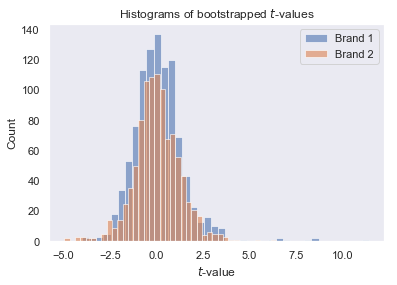

In [18]:
plt.hist(brand_1_ts,bins=40,alpha=0.6,label='Brand 1')
plt.hist(brand_2_ts,bins=40,alpha=0.6,label='Brand 2')
plt.legend()
plt.title("Histograms of bootstrapped $t$-values")
plt.xlabel("$t$-value")
plt.ylabel("Count")
plt.show()

Jotain hienoista eroa on huomattavissa. Lasketaanpa seuraavaksi vaihteluvälit brändikohtaisesti.

In [19]:
def calculate_mean_ci(samples, bootstrapped_ts, alpha):
    samples_count = len(samples)
    samples_mean = np.mean(samples)
    samples_std = np.std(samples)

    t_low = bootstrapped_ts[int(len(bootstrapped_ts)*(0+alpha/2))]
    t_high = bootstrapped_ts[int(len(bootstrapped_ts)*(1-alpha/2))]

    interval_low = samples_mean+(t_low*samples_std/np.sqrt(samples_count))
    interval_high = samples_mean+(t_high*samples_std/np.sqrt(samples_count))
    
    return (interval_low, interval_high)

brand_1_mean_ci = calculate_mean_ci(brand_1, brand_1_ts, 0.05)
brand_2_mean_ci = calculate_mean_ci(brand_2, brand_2_ts, 0.05)

print(f"Brand 1: ({brand_1_mean_ci[0]:.3f}, {brand_1_mean_ci[1]:.3f})")
print(f"Brand 2: ({brand_2_mean_ci[0]:.3f}, {brand_2_mean_ci[1]:.3f})")


Brand 1: (37.488, 40.642)
Brand 2: (36.545, 45.130)


Seuraavaksi on vuorossa keskihajonnan vaihteluvälien selvitys. Koska molempien jakaumien kohdilla voidaan ensimmäiseen osioon nojaten tehdä oletus normaalijakautuneisuudesta (kirjassa on kutakuinkin yhtä heitteleviä kuvaajia nimetty normaalijakautuneiksi), edetään $\chi^2$-pohjaisilla hajonnan vaihteluvälin selvitysmenetelmillä. Menetelmää varten vaadittavat suureet ovat

$$\alpha = 0.05$$
$$ \text{df}=9 $$
$$ s_1 = 1.954 $$
$$ s_2 = 5.579 $$

Koska $\chi^2$-raja-arvot ovat riippuvaisia vain $\alpha$:sta ja vapausasteista, ne ovat

$$\chi^2_L=19.02 \hspace{0.5cm}\text{ja}\hspace{0.5cm} \chi^2_R=2.700 $$

Lasketaan lopuksi vielä brändikohtaiset hajonnan vaihteluvälit näitä tietoja käyttäen.

In [20]:
df = 9
s1 = 1.954
s2 = 5.579
chi2_left = 19.02
chi2_right = 2.7

calculate_std_ci = lambda s: (np.sqrt(df*s**2/chi2_left),np.sqrt(df*s**2/chi2_right))

brand_1_std_ci = calculate_std_ci(s1)
brand_2_std_ci = calculate_std_ci(s2)

print(f"Brand 1: ({brand_1_std_ci[0]:.3f}, {brand_1_std_ci[1]:.3f})")
print(f"Brand 2: ({brand_2_std_ci[0]:.3f}, {brand_2_std_ci[1]:.3f})")

Brand 1: (1.344, 3.567)
Brand 2: (3.838, 10.186)


Lopputulos luottamusvälien kohdalla on siis seuraava:

$$\text{Brand 1}: \text{CI}^{\mu}_{95\%}=(37.488, 40.642) \hspace{0.5cm}\text{ja}\hspace{0.5cm} \text{CI}^{\sigma}_{95\%}=(1.344, 3.567)$$
$$\text{Brand 2}: \text{CI}^{\mu}_{95\%}=(36.545, 45.130) \hspace{0.5cm}\text{ja}\hspace{0.5cm} \text{CI}^{\sigma}_{95\%}=(3.838, 10.186)$$


**C. Does there appear to be a difference in wear characteristics for the two brands? Justify
your statement with appropriate plots of the data, tests of hypotheses, and confidence
intervals.**

Lopuksi tulee vielä vertailla brändien otoksia keskenään. Pelkästään luottamusvälien kohdalla voidaan todeta, että otosten populaatioiden kulumarajojen keskiarvot ovat samalla alueella. Ero tulee hajonnan suuruuksissa, jossa toisen brändin hajonnan luottamusvälin alaraja on suurempi, kuin esimmäisen brändin hajonnan luottamusvälin yläraja. Esitetäänpä tämä vielä kuvaajana.

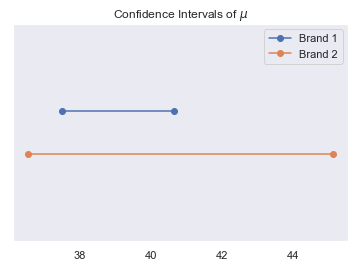

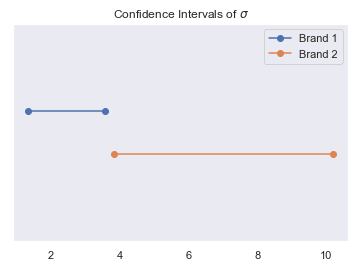

In [42]:
plt.plot((37.488, 40.642),(6,6),marker='o',label='Brand 1')
plt.plot((36.545, 45.130),(4,4),marker='o',label='Brand 2')
plt.ylim(0,10);plt.yticks([]);plt.legend()
plt.title("Confidence Intervals of $\mu$")
plt.show()

plt.plot((1.344, 3.567),(6,6),marker='o',label='Brand 1')
plt.plot((3.838, 10.186),(4,4),marker='o',label='Brand 2')
plt.ylim(0,10);plt.yticks([]);plt.legend()
plt.title("Confidence Intervals of $\sigma$")
plt.show()

> *Kommentti: Kommenttina vaan loppupäätelmistä että jos otokset ovat samankokoisia, en oikein näe että varianssien luottamusväleillä olisi paljon merkitystä vaan varianssit itse kertovat datan hajautuneisuuden.*
>
> **Vastaus**: Hajontahan tosiaan on molempiin suuntiin eikä siis vaikuta populaatioiden keskiarvon arviointiin tässä kohdin.

Kuten kuvaajista voi nähdä ja lasketuista hajontojen luottamusväleistä samoin todeta, ovat brändien hajonnat toisistaan täysin poikkeavat. Kuvaajien perusteella kuitenkin intuitiivisesti voitaisiin todeta, että kakkosbrändin keskiarvo voisi olla silti ensimmäistä brändiä korkeampi. Testataanpa tätä hypoteesiä. Kun $\mu_1$ on ensimmäisen brändin keskiarvo ja $\mu_2$ toisen, niin

$$ \text{df} = 9 $$
$$ \alpha = 5\% $$

$$ \mu_2 \rightarrow \mu_0 $$
$$ H_0 = \mu_1 \ge \mu_0 $$
$$ H_a = \mu_1 < \mu_0 $$

Kyseessä on siis yksipuolinen testi. Aloitetaan katsomalla taulukosta $t$-arvon raja-arvo, joka on

$$ t_\alpha = 1.833 $$

Jatketaan seuraavaksi ensimmäisen brändin laskennallisen $t$-arvon laskemisella.

In [45]:
mu_0 = np.mean(brand_2)
brand_1_t = (np.mean(brand_1) - mu_0)/(np.std(brand_1)/np.sqrt(len(brand_1)))
brand_1_t

-3.206818654011671

$$ t_1 \approx -3.207 \ll t_\alpha $$

Selvitetäänpä asiaa vielä toisesta näkökulmasta. Käännetään hypoteesit toisin päin siten, että testattavaa onkin toisen brändin keskiarvo.

$$ \mu_1 \rightarrow \mu_0 $$
$$ H_0 = \mu_2 \le \mu_0 $$
$$ H_a = \mu_2 > \mu_0 $$

Koska $t_\alpha$ pysyy samana, voidaan $t_2$ laskea suoraan.

In [46]:
mu_0 = np.mean(brand_1)
brand_2_t = (np.mean(brand_2) - mu_0)/(np.std(brand_2)/np.sqrt(len(brand_2)))
brand_2_t

1.1232321145693316

$$ t_2 \approx 1.123 < t_\alpha $$

Nollahypoteesiä ei kummassakaan tapauksessa voida ainakaan käytettävissä olevan datan perusteella hylätä. Toisin sanoen varmuutta siitä, onko toinen brändeistä merkittävästi toista parempi, ei voida saada. Jos jotain, voidaan se todeta, että ensimmäisen brändin laatu on tasaisempaa, kuin toisen.

## 8.06

A large laboratory has four types of devices used to determine the pH of soil samples. The laboratory wants to determine whether there are differences in the average readings given by these devices. The lab uses 24 soil samples having known pH in the study, and randomly assigns six of the samples to each device. The soil samples are tested and the response recorded is the difference between the pH reading of the device and the known pH of the soil. These values, along with summary statistics, are given in the following table.

| Device/Sample | 1     | 2     | 3     | 4     | 5     | 6     | Size | Mean   | Deviation |
|---------------|-------|-------|-------|-------|-------|-------|------|--------|-----------|
| A             | -.307 | -.294 | .079  | .019  | -.136 | -.324 | 6    | -.1605 | .1767     |
| B             | -.176 | .125  | -.013 | .082  | .091  | .459  | 6    | .0947  | .2091     |
| C             | .137  | -.063 | .240  | -.050 | .318  | .154  | 6    | .1227  | .1532     |
| D             | -.042 | .690  | .201  | .166  | .219  | .407  | 6    | .2735  | .2492     |

**A. Based on your intuition, is there evidence to indicate any difference among the mean
differences in pH readings for the four devices?**

Ensin tehtävänä on käyttää vain omaa intuitiota laitteiden välisten mittauserojen tarkasteluun. Tarkemmin sanottuna päätellä tulisi, että onko erot merkittäviä laitekohtaisten päätelmien tekemiseksi. Erotushan lasketaan tehtävänannossa 

$$\text{pH}_\text{true} - \text{pH}_\text{measured}$$

- A: Laitteen keskiarvo ja hajonta huomioiden ei keskimäärin oikein mittaaminen ole ainakaan poissuljettu vaihtoehto. Se on kuitenkin todettava, että hajonnan ja keskiarvon absoluuttiset arvot ovat melko lähellä toisiaan, jolloin todennäköisintä voisi kuitenkin olla, että A yliarvioi lukemia.
- B: Keskiarvon ja hajontojen absoluuttiset arvot eroavat siinä määrin toisistaan, että melko lähellä nollaa oleva keskiarvo voi hyvinkin kieliä totuudenmukaisemmasta mittaustuloksesta.
- C: Tämän laitteen ongelmana on kutakuinkin sama, kuin laitteen A kohdalla. Keskiarvo ja hajonta huomoiden oikein mittaaminen on toki mahdollista, mutta ns. nollaerotus on hajonnan toisessa ääripäässä ennemmin kuin vankasti sen sisäpuolella. A-laitteeseen verrattuna tämä laite aliarvioi mittatulokset.
- D: Laitteen keskiarvo ja hajonta ei sinällään salli mahdollisuutta nollaerotukselle, eli laite ainakin näiden tietojen pohjalta aliarvioi melko varmasti.

Tehtävänannon hypoteeseiksi voidaan muodostaa seuraavat olettamat:

$$ H_0 : \text{Laitteiden mittausten keskiarvot ovat samat, eli } \mu_1=\mu_2=\mu_3=\mu_4 $$
$$ H_a : \text{Jokin laitteista eroaa muista} $$

Näiden hypoteesien valossa näyttäisi intuitiivisesti siltä, että laitteissa on eroja ja nollahypoteesi tulisi hylätä.

> *Kommentti: Eikö tämä mene päinvastoin kun nollahypoteesi on että keskiarvot ovat samoja?*
>
> **Vastaus**: Totta! Korjattu.

**B. Run an analysis of variance to confirm or reject your conclusion of part (a). Use $\alpha = .05$.**

Seuraavaksi on laskettava näiden neljän otoksen varianssianalyysi. Laskennassa hyödynnetään $F$-testiä.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

n = 6
a = [-.307,-.294,.079,.019,-.136,-.324]
b = [-.176,.125,-.013,.082,.091,.459]
c = [.137,-.063,.240,-.050,.318,.154]
d = [-.042,.690,.201,.166,.219,.407]

samples = pd.DataFrame([a,b,c,d],index=['A','B','C','D']).T
samples.index.name = 'Samples'
samples

,A,B,C,D
Samples,,,,
0,-0.307,-0.176,0.137,-0.042
1,-0.294,0.125,-0.063,0.690
2,0.079,-0.013,0.240,0.201
3,0.019,0.082,-0.050,0.166
4,-0.136,0.091,0.318,0.219
5,-0.324,0.459,0.154,0.407


Aloitetaan ensin normaalijakaumakuvaajien tuottamisella otoskohtaisesti.

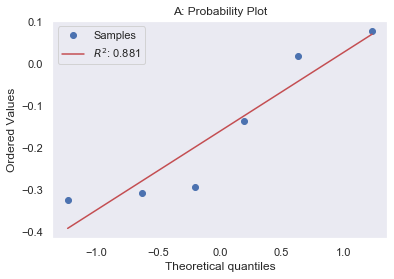

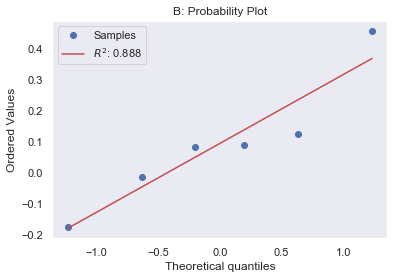

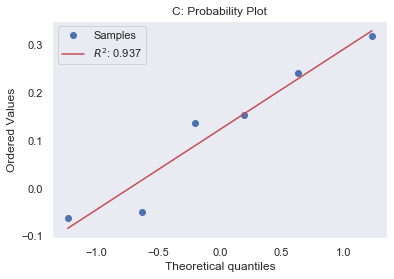

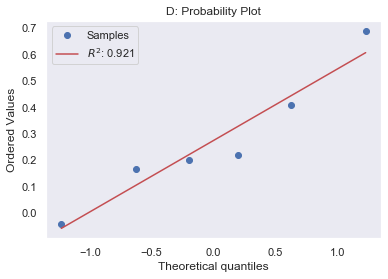

In [5]:
for key,value in {'A':a,'B':b,'C':c,'D':d}.items():
    _,stats = scipy.stats.probplot(value,plot=plt,)
    plt.title(f"{key}: Probability Plot")
    plt.gca().legend(("Samples",f"$R^2$: {stats[-1]**2:.3f}"))
    plt.show()

Tehdäänpä otoksista myös laatikkojanakuvaajat.

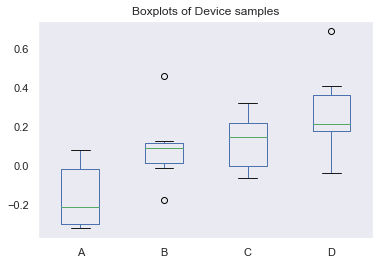

In [6]:
samples.plot.box()
plt.title("Boxplots of Device samples")
plt.show()

Koska kyseessä on pienet näytekoot, on melko epävarmojen kuvaajien lisäksi laskettava ja analysoitava residuaalit.

In [7]:
residuals = pd.DataFrame()
for column in samples.columns:
    residuals.loc[:,column] = samples.loc[:,column]-samples.loc[:,column].mean()
residuals.index.name = 'Residuals'
residuals

,A,B,C,D
Residuals,,,,
0,-0.1465,-0.270667,0.014333,-0.3155
1,-0.1335,0.030333,-0.185667,0.4165
2,0.2395,-0.107667,0.117333,-0.0725
3,0.1795,-0.012667,-0.172667,-0.1075
4,0.0245,-0.003667,0.195333,-0.0545
5,-0.1635,0.364333,0.031333,0.1335


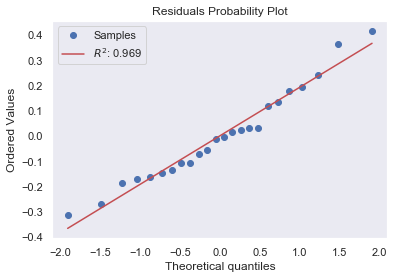

In [8]:
_,stats = scipy.stats.probplot(residuals.values.flatten(),plot=plt)
plt.title(f"Residuals Probability Plot")
plt.gca().legend(("Samples",f"$R^2$: {stats[-1]**2:.3f}"))
plt.show()

Lähtökohtaisesti voidaan todeta, että jokaisen otoksen kohdalla voidaan tehdä oletus normaalijakautuneisuudesta, sillä residuaalit näyttävät olevan normaalijakautuneita. Koska tehtävänantona on monen otoksen varianssianalyysi, otoksien näytteiden on myös oltava riippumattomia satunnaisnäytteitä yhdenmukaisen varianssin omaavista populaatiosta. Näin on, tehtävänantoon nojaten. 

> *Kommentti: tässä näyttäisi olevan ongelmia. Tehtävä noudattaa käsittääkseni kirjan esimerkkiä 8.3. SSW ja SSB on mielestäni jaettu väärillä luvuilla (SSW pitäisi jakaa kaikkien näytteiden lukumäärällä – 1 ja SSB vastaavasti yhden ryhmän).*
>
> **Vastaus**: Totta. Kirja sivulta 410 löytyi kaavat ja olen nähtävästi sekoittanut jakajat keskenään. Korjattu ja laskettu uudelleen.

Lasketaan seuraavaksi likimääräinen arvio otosten varianssista $s^2_W$ käyttäen näytteen neliösummaa $\text{SSW}$.

In [9]:
ssw = 0
for sample in [a,b,c,d]:
    ssw += sum([(v-np.mean(sample))**2 for v in sample])
ssw

0.8028956666666667

$$ \text{SSW} \approx 0.803 $$

In [10]:
within_samples = ssw / 20
within_samples

0.040144783333333336

$$ n_T = \text{näytteiden määrä} = 24 $$
$$ t = \text{otosten määrä} = 4 $$

$$s^2_W = \frac{\text{SSW}}{n_t-t} \approx .040 $$

$F$-testiä varten on myös laskettava $s^2_B$, joka on otosten keskiarvojen varianssin mitta.

In [11]:
samples_mean = np.mean([a,b,c,d])
ssb = 0
for sample in [a,b,c,d]:
    ssb += n*(np.mean(sample) - samples_mean)**2
ssb

0.5837481666666666

$$ \text{SSB} \approx .584$$

In [12]:
between_samples = ssb/3
between_samples

0.1945827222222222

$$ s^2_B = \frac{\text{SSB}}{t-1} \approx .195 $$

In [13]:
f_test = between_samples / within_samples
f_test

4.847023848816111

$$ F = \frac{s^2_B}{s^2_W} \approx 4.847 $$

Mikäli $F$-testin arvo ylittää taulukoidun raja-arvon suhteessa $\alpha$-arvoon sekä kahteen neliösummien jakajana toimineeseen vapausasteiden määrään nähden, on nollahypoteesi otosten keskiarvojen samankaltaisuudesta hylättävä.

$$ F_{\alpha,\text{df}_1,\text{df}_2} = F_{.05,3,23} = 3.03 < F$$

Nollahypoteesi tulee siis hylätä.

**C. Compute the p-value of the F test in part (b).**

Taulukkoja käytettäessä on testin $p$-arvo jälleen haarukoitava. $F$-testin tulos haarukoituu käytetyillä vapausasteilla väliin

$$ F_{.01,3,23} = 4.76 < F < F_{.005,3,23} = 5.58 $$

Toisin sanoen testin $p$-arvo on

$$ 0.005 < p < 0.01 $$

**D. What conditions must be satisfied for your analysis in parts (b) and (c) to be valid?**

Nämä mainittiinkin jo edeltävässä tehtävässä ja todennettiinkin, mutta

1. Normaalijakaumaoletuksen on pädettävä otoksiin
2. Näytteiden on oltava satunnaisesti nostettuja ja riippumattomia.
3. Näytteistetyn populaation varianssin on oltava sama kautta otosten.

(1) todennettiin normaalijakaumakuvaajilla ja (2-3) tehtävänannon tekstiin nojaten.

**E. Suppose the 24 soil samples have widely different pH values. What problems may
occur by simply randomly assigning the soil samples to the different devices?**

Otokset voisivat näyttää merkittävästi varianssin osalta soisitaan eroavilta, jolloin esimerkiksi $F$-testin tekemisellä ei saataisi luotettavia tuloksia keskiarvojen samankaltaisuuden arviointiin.

## 9.12

Refer to Exercise 7.20. 

> A wildlife biologist was interested in determining the effect of raising deer in captivity on the size of the deer. She decided to consider three populations: deer raised in the wild, deer raised on large hunting ranches, and deer raised in zoos. She randomly selected eight deer in each of the three environments and weighed the deer at age 1 year. The weights (in pounds) are given in the following table.

| Wild        | 114.7 | 128.9 | 111.5 | 116.4 | 134.5 | 126.7 | 120.6 | 129.59 |
|-------------|-------|-------|-------|-------|-------|-------|-------|--------|
| Ranch       | 120.4 | 91.0  | 119.6 | 119.4 | 150.0 | 169.7 | 100.9 | 76.1   |
| Zoo         | 103.1 | 90.7  | 129.5 | 75.8  | 182.5 | 76.8  | 87.3  | 77.3   |

The wildlife biologist was interested in determining if the mean weights of deer raised in a zoo would be lower than those from a more uncontrolled environment, for example, either from the wild or raised on a ranch. 

**A. Use a multiple comparison procedure to determine if the mean weight of the deer raised in the wild or on a ranch is significantly higher than the mean weight of deer raised in a zoo.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

wild = [114.7,128.9,111.5,116.4,134.5,126.7,120.6,129.59]
ranch = [120.4,91.0 ,119.6,119.4,150.0,169.7,100.9,76.1]
zoo = [103.1,90.7 ,129.5,75.8 ,182.5,76.8 ,87.3 ,77.3]

samples = pd.DataFrame([wild,ranch,zoo],index=['Wild','Ranch','Zoo']).T
samples.index.name = 'Samples'
samples

,Wild,Ranch,Zoo
Samples,,,
0,114.70,120.4,103.1
1,128.90,91.0,90.7
2,111.50,119.6,129.5
3,116.40,119.4,75.8
4,134.50,150.0,182.5
5,126.70,169.7,76.8
6,120.60,100.9,87.3
7,129.59,76.1,77.3


Aivan ensimmäiseksi aloitetaan toistaiseksi tuntemattoman datan visualisoinnilla.

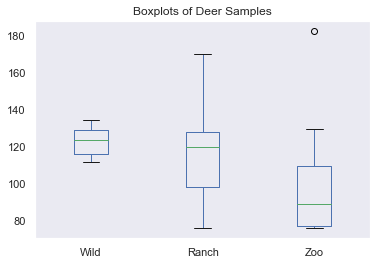

In [2]:
samples.plot.box()
plt.title("Boxplots of Deer Samples")
plt.show()

Luonnossa ja tiloilla kasvaneiden peurojen painot näyttävät jakautuvan normaalisti, kun taas eläintarhan painot ovat epänormaalisti jakautuneita. Jatketaan Kruskal-Wallisin testin vaatimalla arvojen järjestämisellä. Tätä varten näytteet asetetaan yhteen riviin siten, että näytteet identifioidaan tunnistettavasti.

In [3]:
rankings = pd.concat((samples.loc[:, 'Wild'],
                      samples.loc[:, 'Ranch'],
                      samples.loc[:, 'Zoo']),
                     keys=['Wild', 'Ranch', 'Zoo']).rank()
rankings

       Samples
Wild   0          11.0
       1          18.0
       2          10.0
       3          12.0
       4          21.0
       5          17.0
       6          16.0
       7          20.0
Ranch  0          15.0
       1           7.0
       2          14.0
       3          13.0
       4          22.0
       5          23.0
       6           8.0
       7           2.0
Zoo    0           9.0
       1           6.0
       2          19.0
       3           1.0
       4          24.0
       5           3.0
       6           5.0
       7           4.0
dtype: float64

Lasketaanpa seuraavaksi otoskohtaiset sijoitussummat.

In [4]:
ranksum_wild = rankings.loc['Wild',:].sum()
ranksum_ranch = rankings.loc['Ranch',:].sum()
ranksum_zoo = rankings.loc['Zoo',:].sum()
ranksums = (ranksum_wild,ranksum_ranch,ranksum_zoo)
ranksums

(125.0, 104.0, 71.0)

Sijoitussummat ovat seuraavat:

$$T_\text{Wild} = 125$$
$$T_\text{Ranch} = 104$$
$$T_\text{Zoo} = 71$$

Varmistetaan myös kaiken varalta, ettei sijoituksissa ole jaettuja sijoja.

In [5]:
rankings.unique().size == rankings.size

True

Ei ole. Eli voidaan jatkaa eteenpäin testisuureen $H$ laskennassa käyttäen kaavaa

$$ H = \frac{12}{n_T(n_T+1)}\sum_i\frac{T^2_i}{n_i}-3(n_T+1)$$

jossa

$$n_T: \text{Näytteiden kokonaismäärä } = 24$$
$$n_i: \text{Otoksen näytteiden määrä } = 8 \text{ (vakio)}$$
$$T_i: \text{Otoksen sijoitusten summa }$$

In [6]:
h_test = 12/(24*25)*sum([(ranksum**2/8) for ranksum in ranksums])-3*25
h_test

3.7049999999999983

$$H \approx 3.705$$

Käyttämällä myöhemmässä osatehtävässä määritettyä arvoa $\alpha = .05$ ja otosten määrästä johdettua arvoa $\text{df} = k-1 = 2$, määritetään seuraavaksi, että voidaanko nollahypoteesiä 

$$ H_0: \text{Jakaumat ovat identtisiä} $$

hylätä. Taulukosta lukien kriittinen raja

$$ H_\alpha = 5.991 > H$$

Siispä *dataan pohjaavia perusteita nollahypoteesin hylkäykseen pelkän Kruskal-Wallisin testin perusteella ei ole*. Tämän testin tulos on kuitenkin hieman epäilyttävä, ja todennäköistä on, että ``Zoo``-otoksesta löytyvä räikeä poikkeama sotkee testin.

**B. Write a linear contrast to compare the average weight of deer raised in a zoo or on a ranch to the mean weight of deer raised in the wild.**

Aloitetaan tunnuslukujen selvittämisellä.

In [11]:
pd.options.display.float_format = '{:.3f}'.format
samples.describe().loc[('count','mean','std'),:]

,Wild,Ranch,Zoo
count,8.000,8.000,8.000
mean,122.861,118.387,102.875
std,8.233,30.433,36.853


Muodostetaan seuraavaksi neliösummalaskennat peuraotosten vertailuun. Vertailtavana on kolme populaatiota, joista kahta verrataan yhteen vuorollaan (näin tehtävänannosta ymmärsin). Laskettavat kontrastit ovat siis

- ``Wild`` vs. ``Zoo``
- ``Ranch`` vs. ``Zoo``

Lasketaanpa seuraavaksi varsinaiset kontrastit.

In [49]:
l_wild_vs_zoo = samples['Wild'].mean() - samples['Zoo'].mean()
l_ranch_vs_zoo = samples['Ranch'].mean() - samples['Zoo'].mean()
print(f"{l_wild_vs_zoo:2.2f}, {l_ranch_vs_zoo:2.2f}")

19.99, 15.51


In [60]:
n = 8
ssc_wild_vs_zoo = 8*l_wild_vs_zoo**2/2
ssc_ranch_vs_zoo = 8*l_ranch_vs_zoo**2/2
print(f"{ssc_wild_vs_zoo:.0f}, {ssc_ranch_vs_zoo:.1f}")

1598, 962.6


| Contrast      | $a_\text{Wild}$ | $a_\text{Ranch}$ | $a_\text{Zoo}$ | $\sum a^2_t$ | $\hat{l}$ | $\text{SSC}_t$ |
|---------------|-----------------|------------------|----------------|--------------|-----------|----------------|
| Wild vs Zoo   | 1               | 0                | -1             | 2            | 19.99     | 1598           |
| Ranch vs. Zoo | 0               | 1                | -1             | 2            | 15.51     | 962.6          |

Tarkistetaan seuraavaksi, ovatko lasketut lineaarikontrastit toisilleen vastakkaisia.

$$\hat{l}_1 \text{ ja } \hat{l}_2 = (1)(0) + (0)(1) + (-1)(-1) = 1 $$ 

Kontrastit eivät ole vastakkaisia, eli ne selittävät jotain toisistaan ja ovat täten jossain määrin riippuvaisia toisistaan. Tämä on toisaalta ymmärrettävää, sillä kummassakin kontrastissa esiintyy ``Zoo``.

**C. Test at the $\alpha = .05$ level if your contrast in (b) is significantly different from zero. What conclusions can you make from this test?**

Lopuksi lasketaan vielä kummankin kontrastin nollasta eroavuuden merkitsevyys käyttämällä $F$-testiä.

In [57]:
ssw = sum([sum([(v-sample.mean())**2 for v in sample]) for key,sample in samples.T.iterrows()])
print(f"{ssw:.0f}")

16464


In [58]:
f_wild_vs_zoo = ssc_wild_vs_zoo/ssw
f_ranch_vs_zoo = ssc_ranch_vs_zoo/ssw
print(f"{f_wild_vs_zoo:.4f}, {f_ranch_vs_zoo:.4f}")

0.0970, 0.0585


$$ F_\text{Wild vs. Zoo} = \frac{\text{SSC}_\text{Wild vs. Zoo}}{s^2_W} = \frac{1598}{16464} = .0970$$
$$ F_\text{Ranch vs. Zoo} = \frac{\text{SSC}_\text{Ranch vs. Zoo}}{s^2_W} = \frac{962.6}{16464} = .0585$$

Kun $\alpha=.05$, $\text{df}_1 = 1$ ja $\text{df}_2 = n_T - t = 24 - 3 = 21$ saadaan $F$-testin raja-arvoksi

$$ F_{.05, 1, 21} = 4.32 \gg (.0970, .0585) $$

Tähän tietoon nojaten voidaan todeta, kummankaan lineaarikontrastin kohdalla ei voida nollahypoteesiä hylätä. Kummassakin tapauksessa lineaarikontrastit eroavat liian vähän nollasta, jolloin ne toisin sanoen ovat siis liian samankaltaisia. Tässä kohdin on kuitenkin palattava jo ensimmäsen osan havaintoon ``Zoo``-otoksen poikkeavasta arvosta, joka vaikuttaa sekä otoksen keskiarvoon että hajontaan. Näytteiden vähyyden vuoksi perusteita poikkeavan havainnon poistamiseen ei kuitenkaan mielestäni ole. 

## 10.06

The test was developed in the 1980s for screening donated blood for the presence of HIV. The test is designed to detect antibodies, substances produced in the body of donors carrying the virus; however, the test is not 100% accurate. The developer of the test claimed that the test would produce fewer than 5% false positives and fewer than 1% false negatives. In order to evaluate the accuracy of the test, 1,000 persons known to have HIV and 10,000 persons known to not have HIV were given the test. The following results were tabulated:

| Test Result   | Has HIV | Does Not Have HIV | Total |
|---------------|---------|-------------------|-------|
| Positive Test | 993     | 591               | 1584  |
| Negative Test | 7       | 9409              | 9416  |
| Total         | 1000    | 10000             | 11000 |

**A. Place a 95% confidence interval on the proportion of false positives produced by the test.**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

true_pos = 993
false_pos = 591
false_neg = 7
true_neg = 9409

total_pos = true_pos+false_neg
total_neg = false_pos+true_neg
total = total_pos+total_neg
total

11000

Tehtävänä on siis selvittää, mikä on väärien positiivisten testitulosten todennäköisyysden luottamusväli. Luottamusvälin laskennassa lähdetään siis siitä, että kirjan notaatioon nojaten

$$ y = n_{(\text{ Testi positiivinen} \hspace{0.1cm}\mid\hspace{0.1cm} \text{Ei HI-virusta })} $$

In [20]:
y = false_pos
n = total
pi = y/n
y, n, pi

(591, 11000, 0.05372727272727273)

$$y=591$$
$$n=11000$$
$$\hat{\pi}=.0537$$

> *Kommentti: kysymyksiä herätti FP-tapausten käsitteleminen erillisinä eli että onko oikeutettu jakaa 591/11000 tai pitäisikö ottaa jotenkin huomioon myös TP-tapaukset. En löytänyt vastaavaa casea kirjasta, joten mennään tällä. Toiseksi, kirjan kappaleen 10.2 alussa on kaksi tapaa arvioida luottamusväliä; olet käyttänyt ns. tavallista tapaa, mutta koska pi on aika pieni, olisi ehkä pitänyt käyttää WAC CI:tä?*
>
> **Vastaus**: Kirjan sivulla 502 itseasiassa minitaankin, että mikäli näytteitä on vähän ja/tai $\pi < .2$ tai $\pi > .8$, tulisi normaalin Wald-luottamusvälin sijasta laskea WAC-luottamusväli. Korjataan siis!

WAC-luottamusvälin laskentaa varten on aivan ensimmäiseksi selvitettävä $z_{\alpha/2}$. Koska luottamusväliksi oli määritetty $.95$, on

$$ \alpha = 1 - .95 = .05 $$

Tällöin kirjan merkintätapaa mukaillen

$$ z_{\alpha/2} = z_{.025} = -1.96 $$

Esimerkkejä lukien oikea tapa selvittää $z$ olisi kuitenkin ilmeisesti käyttää taulukosta luettavana arvona $1-(\alpha/2)$, sillä esimerkin 10.1 mukaan $.90$ luottamusvälillä $\alpha=.10$ ja vastaavasti taulukosta on luettu $z_{\alpha/2}=1.645$. Kyseisen arvon tuottava taulukkoarvo on $.950$. Siispä laskuissa oikeasti käytetyksi odotettava $z$-arvo onkin

$$ z_{1-\alpha/2} = z_{.975} = 1.96 $$

Seuraavaksi lasketaan korjatut arvot $\tilde{y}$, $\tilde{n}$ ja $\tilde{\pi}$.

In [17]:
z = 1.96
y_adjusted = y+0.5*z**2
n_adjusted = n+z**2
pi_adjusted = y_adjusted/n_adjusted

y_adjusted,n_adjusted, pi_adjusted

(592.9208, 11003.8416, 0.0538830729806216)

$$\tilde{y} = 592.9$$
$$\tilde{n} = 11003$$
$$\tilde{\pi} = .0539 $$

Korjattuja arvoja käyttäen voidaan sitten laskea keskiarvon luottamusväli (s. 502 laatikko).

In [22]:
interval = z * np.sqrt((pi_adjusted*(1-pi_adjusted)) / n_adjusted)
y_ci_low = pi_adjusted - interval
y_ci_high = pi_adjusted + interval

print(f"{y_ci_low:.4f}, {y_ci_high:.4f}")

0.0497, 0.0581


$$ \text{CI}^\text{FP}_{95\%} = [.0497, .0581] $$

**B. Is there substantial evidence ($\alpha = .05$) that the test produces less than 5% false
positives?**

Vaikka otoksen keskiarvo on suurempi, kuin luvattu "pienempi kuin 5%", keskiarvon 95 % luottamusvälillä tätä mahdollisuutta ei voida rajata pois. Se on tosin sanottava, että luvattu minimisuorituskyky on luottamusvälin alarajan tuntumassa.

## 11.01

Plot the data shown here in a scatter diagram and sketch a line through the points.

| x | 5  | 10 | 15 | 20 | 25 | 30 |
|---|----|----|----|----|----|----|
| y | 14 | 28 | 43 | 62 | 79 | 87 |

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

x = [5,10,15,20,25,30]
y = [14,28,43,62,79,87]

Aloitetaan pistekuvaajan piirtämisellä.

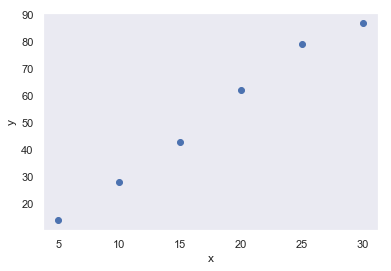

In [146]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Aloitetaan piirtämäällä yksinkertainen suora pisteiden läpi käyttämällä pienimpien neliövirheiden menetelmää. Sen laskentaa varten meidän on selvitettävä termit $\hat{\beta}_0$ ja $\hat{\beta}_1$. 

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x} $$
$$ \hat{\beta}_1 = \frac{S_{xy}}{S_{xx}} $$
$$ S_{xy} = \sum_i(x_i-\bar{x})(y_i-\bar{y}) $$
$$ S_{xx} = \sum_i(x_i-\bar{x})^2 $$

In [147]:
x_mean = np.mean(x)
y_mean = np.mean(y)

s_xx = sum([(x_i-x_mean)**2 for x_i in x])
s_xy = sum([(x_i-x_mean)*(y_i-y_mean) for x_i, y_i in zip(x,y)])
    
print(f"S_xy = {s_xy}")
print(f"S_xx = {s_xx}")

beta_1 = s_xy/s_xx
beta_0 = y_mean - beta_1*x_mean
print(f"Beta_0 = {beta_0:.3f}")
print(f"Beta_1 = {beta_1:.3f}")

S_xy = 1342.5
S_xx = 437.5
Beta_0 = -1.533
Beta_1 = 3.069


$$ \hat{\beta}_0 = -1.533 $$
$$ \hat{\beta}_1 = 3.069 $$

Kulmakerroin on siis sovitetusta lineaarimallista lukien n. kolme. Visualisoidaanpa seuraavaksi opittu lineaarimalli suhteessa dataan.

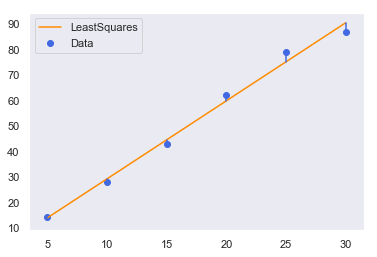

In [148]:
least_squares = lambda x: beta_0 + beta_1 * x
y_hat = list(map(least_squares, x))
plt.plot(x,y_hat,label='LeastSquares',color='darkorange')
for x_i, y_i, y_hat_i in zip(x,y,y_hat):
    plt.plot([x_i,x_i],[y_i,y_hat_i],color='royalblue')
plt.scatter(x,y,label='Data',color='royalblue')
plt.legend()
plt.show()

Piirretään tämän lisäksi myös sovitetun mallin residuaalit.

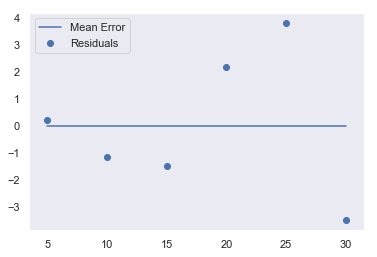

In [152]:
residuals = [y_i-y_hat_i for y_i, y_hat_i in zip(y,y_hat)]
residuals_mean = np.mean(residuals)
plt.plot([x[0],x[-1]],[residuals_mean,residuals_mean],label="Mean Error")
plt.scatter(x,residuals,label="Residuals")
plt.legend()
plt.show()

Residuaaleista lukien näyttäisi siltä, että arvojen kasvaessa myös mallin ennustekyky alkaisi heiketä. Kolmannen asteen funktio voisi tavoittaa pisteet huomattavasti tarkemmin, kuin nyt käytetty ensimmäisen asteen funktio.

## 12.08

A pharmaceutical firm would like to obtain information on the relationship between the dose level and potency of a drug product. To do this, each of 15 test tubes is inoculated with a virus culture and incubated for 5 days at 30° C. Three test tubes are randomly assigned to each of the five different dose levels to be investigated (2, 4, 8, 16, and 32 mg). Each tube is injected with only one dose level and the response of interest (a measure of the protective strength of the product against the virus culture) is obtained. The data are given here.

| Dose Level | Response |
|------------|----------|
| 2          | 5,7,3    |
| 4          | 10,12,14 |
| 8          | 15,17,18 |
| 16         | 20,21,19 |
| 32         | 23,24,29 |

**A. Plot the data.**

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

doses = [2, 4, 8, 16, 32]
responses = [[5, 7, 3],
             [10, 12, 13],
             [15, 17, 18],
             [20, 21, 19],
             [23, 24, 29]]

Rakennetaanpa ensin selkeämpi ``(x,y)``-parinen näytejoukko.

In [28]:
build_dose_responses = lambda x,ys: [(x,y) for y in ys]
samples = []
for dose_responses in list(map(build_dose_responses, doses, responses)):
    samples += list(dose_responses)
x, y = list(zip(*samples))

Seuraavaksi visualisoidaan data.

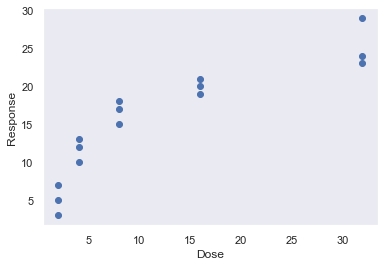

In [29]:
plt.scatter(x,y)
plt.xlabel("Dose")
plt.ylabel("Response")
plt.show()

**B. Fit a linear regression model to these data.**

Tämän jälkeen koitetaan sovittaa dataan lineearimalli. Aloitetaan sen kertoimien laskennasta.

In [30]:
x_mean = np.mean(x)
y_mean = np.mean(y)

s_xx = sum([(x_i-x_mean)**2 for x_i in x])
s_xy = sum([(x_i-x_mean)*(y_i-y_mean) for x_i, y_i in zip(x,y)])
    
print(f"S_xy = {s_xy:.1f}")
print(f"S_xx = {s_xx:.1f}")

beta_1 = s_xy/s_xx
beta_0 = y_mean - beta_1*x_mean
print(f"Beta_0 = {beta_0:.3f}")
print(f"Beta_1 = {beta_1:.3f}")

S_xy = 1035.6
S_xx = 1785.6
Beta_0 = 8.542
Beta_1 = 0.580


$$ \hat{\beta}_0 = 8.542 $$
$$ \hat{\beta}_1 = 0.580 $$

Visualisoidaanpa seuraavaksi opittu lineaarimalli suhteessa dataan.

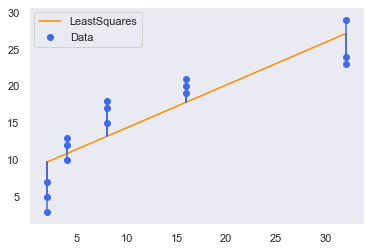

In [31]:
least_squares = lambda x: beta_0 + beta_1 * x
y_hat = list(map(least_squares, x))
plt.plot(x,y_hat,label='LeastSquares',color='darkorange')
for x_i, y_i, y_hat_i in zip(x,y,y_hat):
    plt.plot([x_i,x_i],[y_i,y_hat_i],color='royalblue')
plt.scatter(x,y,label='Data',color='royalblue')
plt.legend()
plt.show()

Piirretään tämän lisäksi myös sovitetun mallin residuaalit.

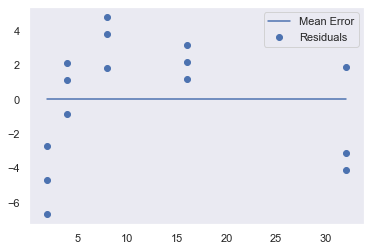

In [32]:
residuals = [y_i-y_hat_i for y_i, y_hat_i in zip(y,y_hat)]
residuals_mean = np.mean(residuals)
plt.plot([x[0],x[-1]],[residuals_mean,residuals_mean],label="Mean Error")
plt.scatter(x,residuals,label="Residuals")
plt.legend()
plt.show()

Yksinkertainen lineaarimalli ei oikein näyttäisi istuvan käytettyyn dataan.

**C. What other regression model might be appropriate?**

Silmämääräisesti näyttäisikin ennemmin siltä, että esimerkiksi nollan kautta hyperbolinen funktio voisi sovittua dataan parhaiten. Esimerkiksi epälineaarinen

$$ y = \beta_1\tanh{(x)} + \epsilon $$

voisi muotonsa puolesta soveltua havaintojen mallintamiseen hyvin. Samoin myös logaritminen kuvaaja.

**D. SAS computer output is shown for both a linear and quadratic regression equation. Which regression equation appears to fit the data better? Why?**

Silmämääräisesti kuvaajat näyttäisivät siltä, että toisen asteen funktio sopii dataan paremmin tuottaen magnitudiltaan pienempiä residuaaleja. Analyysin tulokset ovat kootusti seuraavat:

| Metric   | Linear | Quadratic |
|----------|--------|-----------|
| Root MSE | 3.653  | 2.747     |
| R-square | .7730  | .8815     |

Näiden arvojen valossa toisen asteen funktio näyttäisi olevan kahdesta parempi. Mikäli varianssianalyysin tuloksia $F$- ja $p$-arvojen osalta kuitenkin tulkitsen oikein, niin molemmat mallit hylätään näytteitä kuvaavina.

> *Kommentti: mistä päättelet, että mallit hylätään? Miten voisi vertailla malleja?*
>
> **Vastaus**: Tässä kohdin päätelmä oli ennemmin arvaus. Yritetäänpä siis vielä.

Piirretäänpä kuitenkin vielä mallien ennusteet kuvaajiin ja arvioidaan tuloksia silmämääräisesti.

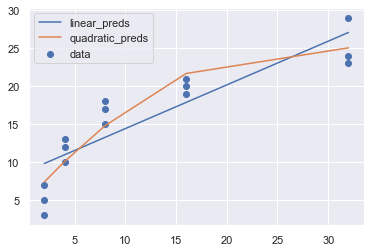

In [33]:
linear_preds = [
    9.8172, 
    10.9677,
    13.2688,
    17.8710,
    27.0753,
]
quadratic_preds = [
    7.3884,
    10.0772,
    14.8071,
    21.6762,
    25.0512,
]
doses = [2,4,8,16,32]
plt.scatter(x,y,label='data')
plt.plot(doses, linear_preds, label='linear_preds')
plt.plot(doses, quadratic_preds, label='quadratic_preds')
plt.legend()
plt.grid()
plt.show()

Silmämääräisesti molemmat mallit näyttäisivät kuitenkin sovittuvan dataan edes jotenkuten, toisen asteen funktio kenties paremmin. Mikäli $F$- ja $p$-arvojen sijasta katsotaankin esimerkiksi mallien $R^2$-arvoa, selittää lineaarimalli $77.3\%$ ja toisen asteen malli $88.2\%$ datan varianssista. Näin tarkasteltuna näistä malleista toisen asteen malli sopisi dataan paremmin.

## 13.08

The cotton aphid is pale to dark green in cool seasons and yellow in hot, dry summers. Generally distributed throughout temperate, subtropic, and tropic zones, the cotton aphid occurs in all cotton-producing areas of the world. These insects congregate on lower leaf surfaces and on terminal buds, extracting plant sap. If weather is cool during the spring, populations of natural enemies will be slow in building up and heavy infestations of aphids may result. When this occurs, leaves begin to curl and pucker; seedling plants become stunted and may die. Most aphid damage is of this type. If honeydew resulting from late season aphid infestations falls onto open cotton, it can act as a growing medium for sooty mold. Cotton stained by this black fungus is reduced in quality and brings a low price for the grower. Entomologists studied the aphids to determine weather conditions which may result in increased aphid density on cotton plants. The following data were reported in Statistics and Data Analysis (2005) by Peck, Olson, and Devore and come from an extensive study as reported in the article, “Estimation of the economic threshold of infestation for cotton aphid,” Mesopotamia Journal of Agriculture (1982): 71–75. In the following table,

$$ y = \text{infestation rate (aphids/100 leaves)} $$
$$ x_1 = \text{mean temperature (C)} $$
$$ x_2 = \text{mean relative humidity} $$

| Field | y   | x1   | x2   | Field | y   | x1   | x2   |
|-------|-----|------|------|-------|-----|------|------|
| 1     | 61  | 21.0 | 57.0 | 18    | 25  | 33.5 | 18.5 |
| 2     | 77  | 24.8 | 48.0 | 19    | 67  | 33.0 | 24.5 |
| 3     | 87  | 28.3 | 41.5 | 20    | 40  | 34.5 | 16.0 |
| 4     | 93  | 26.0 | 56.0 | 21    | 6   | 34.3 | 6.0  |
| 5     | 98  | 27.5 | 58.0 | 22    | 21  | 34.3 | 26.0 |
| 6     | 100 | 27.1 | 31.0 | 23    | 18  | 33.0 | 21.0 |
| 7     | 104 | 26.8 | 36.5 | 24    | 23  | 26.5 | 26.0 |
| 8     | 118 | 29.0 | 41.0 | 25    | 42  | 32.0 | 28.0 |
| 9     | 102 | 28.3 | 40.0 | 26    | 56  | 27.3 | 24.5 |
| 10    | 74  | 34.0 | 25.0 | 27    | 60  | 27.8 | 39.0 |
| 11    | 63  | 30.5 | 34.0 | 28    | 59  | 25.8 | 29.0 |
| 12    | 43  | 28.3 | 13.0 | 29    | 82  | 25.0 | 41.0 |
| 13    | 27  | 30.8 | 37.0 | 30    | 89  | 18.5 | 53.5 |
| 14    | 19  | 31.0 | 19.0 | 31    | 77  | 26.0 | 51.0 |
| 15    | 14  | 33.6 | 20.0 | 32    | 102 | 19.0 | 48.0 |
| 16    | 23  | 31.8 | 17.0 | 33    | 108 | 18.0 | 70.0 |
| 17    | 30  | 31.3 | 21.0 | 34    | 97  | 16.3 | 79.5 |

**A. Fit the model $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon $ to the aphid data.**

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

Ensin tehtävänä on sovittaa malliin määritetty kahden muuttujan lineaarifunktio. Aloitetaan datan kokoamisella käsiteltävään muotoon.

In [158]:
data = np.array([
    [1,61,21.0,57.0],
    [2,77,24.8,48.0],
    [3,87,28.3,41.5],
    [4,93,26.0,56.0],
    [5,98,27.5,58.0],
    [6,100,27.1,31.0],
    [7,104,26.8,36.5],
    [8,118,29.0,41.0],
    [9,102,28.3,40.0],
    [10,74,34.0,25.0],
    [11,63,30.5,34.0],
    [12,43,28.3,13.0],
    [13,27,30.8,37.0],
    [14,19,31.0,19.0],
    [15,14,33.6,20.0],
    [16,23,31.8,17.0],
    [17,30,31.3,21.0],
    [18,25,33.5,18.5],
    [19,67,33.0,24.5],
    [20,40,34.5,16.0],
    [21,6,34.3,6.0],
    [22,21,34.3,26.0],
    [23,18,33.0,21.0],
    [24,23,26.5,26.0],
    [25,42,32.0,28.0],
    [26,56,27.3,24.5],
    [27,60,27.8,39.0],
    [28,59,25.8,29.0],
    [29,82,25.0,41.0],
    [30,89,18.5,53.5],
    [31,77,26.0,51.0],
    [32,102,19.0,48.0],
    [33,108,18.0,70.0],
    [34,97,16.3,79.5]])
fields, y, x1, x2 = data[:,0],data[:,1],data[:,2],data[:,3]

Koska tähän mennessä on jo kertaalleen implementoitu yksi lineaarimalli käsin, käytetään tässä kohdin helpompaa valmista implementaatiota. Yksi *least squares* implementaatio löytyy ``sklearn``-kirjastosta ``linear_model``-moduulista. Käytetään sitä, mutta visualisoidaan nyt dataa kuitenkin ensin.

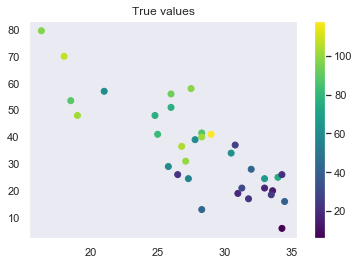

In [145]:
fig = plt.scatter(x1,x2,c=y,cmap='viridis')
plt.colorbar(fig)
plt.title("True values")
plt.show()

In [152]:
from sklearn.linear_model import LinearRegression
X = list(zip(x1,x2))
model = LinearRegression()
model.fit(X=X,y=y)
model.coef_, model.intercept_

(array([-0.67645365,  1.28113633]), 35.82546961324263)

Muodostetaanpa vielä mallilla ennusteet ja visualisoidaan ne.

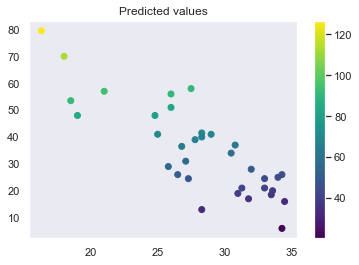

In [153]:
y_pred = model.predict(X)
fig = plt.scatter(x1,x2,c=y_pred,cmap='viridis')
plt.colorbar(fig)
plt.title("Predicted values")
plt.show()

Koulutettu malli on seuraava:

$$ \hat{y} = 35.825 + (-.6765)x_1 + 1.281x_2 $$

Selvitetäänpä vielä mallin $R^2$-arvo.

In [156]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.550017827004868

$$ R^2 = 0.550 $$

**B. Use residual plots, test of hypotheses, and other diagnostic statistics to identify possible
additional terms to add to the model fit in part (a).**

Aloitetaan tämä tehtävä muodostamalla ensin residuaalit.

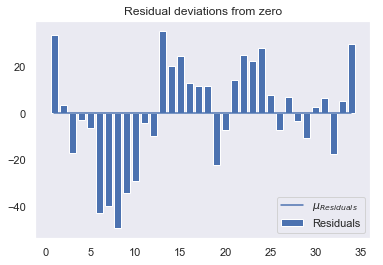

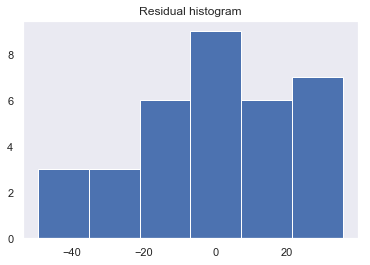

In [160]:
residuals = y_pred - y

plt.bar(fields,residuals,label='Residuals')
plt.plot([fields[0],fields[-1]],[residuals.mean(),residuals.mean()],
         label='$\mu_{Residuals}$')
plt.title("Residual deviations from zero")
plt.legend()
plt.show()

plt.hist(residuals,bins=6)
plt.title("Residual histogram")
plt.show()

Kuvaajista lukien residuaalit eivät ainakaan ole suoranaisesti normaalijakautuneita. Ensisilmäyksellä residuaalit näyttävät hajoavat kutakuinkin keskiarvon molemmin puolin melko epäsäännönmukaisestikin. Tietyssä mielessä residuaaleista voitaisiin löytää jokseenkin epäsäännöllinen jaksottaisuus. Joka tapauksessa data näyttää ennemmin epälineaariselta, kuin lineaariselta. Tätä voitaisiin itseasiassa kokeilla hieman enemmänkin. Tehdään tätä varten funktio, joka tulostaa ennusteet ja residuaalit sekä $R^2$-arvot kulloisellekin mallille.

In [243]:
def evaluate(X,y):
    model = LinearRegression()
    model.fit(X=X,y=y)
    print(f"Coefficients:{model.coef_}")
    print(f"Intercept:{model.intercept_}")
    
    y_pred = model.predict(X)
    residuals = y_pred - y
    
    plt.rcParams['figure.figsize'] = 10,8

    plt.subplot(221)
    fig = plt.scatter(x1,x2,c=y,cmap='viridis')
    plt.colorbar(fig)
    plt.title("True values")
    
    plt.subplot(222)
    plt.scatter(x1,x2,c=y_pred,cmap='viridis')
    plt.colorbar(fig)
    plt.title("Prediction errors")

    plt.subplot(223)
    plt.bar(fields,residuals,label='Residuals')
    plt.plot([fields[0],fields[-1]],[residuals.mean(),residuals.mean()],
             label='$\mu_{Residuals}$')
    plt.title("Residual deviations from zero")
    plt.legend()

    plt.subplot(224)
    plt.hist(residuals,bins=6)
    plt.title("Residual histogram")
    
    plt.tight_layout()

    print("R^2:",r2_score(y,y_pred))

Koitetaanpa ensin vain toisen asteen termien lisäystä, eli 

$$ y_1 = \beta_0 + \beta_1x_1 + \beta_2x2 + \beta_3x_1^2 + \beta_4x_2^2 $$

Coefficients:[ 5.24487464  2.77321693 -0.11851435 -0.01921483]
Intercept:-57.45004565864512
R^2: 0.626647484521615


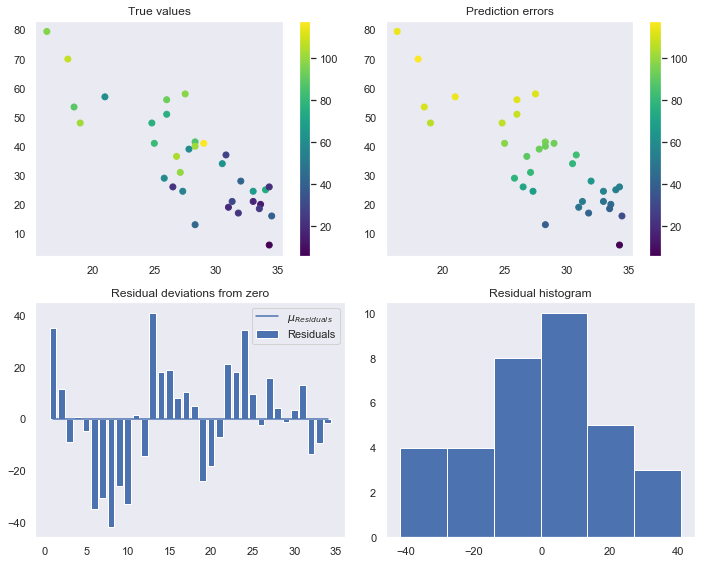

In [245]:
X = list(zip(x1,x2,x1**2,x2**2))
evaluate(X,y)

Tämä ei juuri asiaa muuttanut. Vaikka $R^2 \approx .6266$, ero ei ole järin merkittävä, sillä ennusteet ovat edelleen lineaarisesti vasempaan yläkulmaan kasvavia.

Kuten aiemmin jo todettiin, on datassa havaittavissa myös tietynlaista jaksottaisuutta. Koitetaanpa lisätä toisen asteen termien tilalle alkuperäisten muuttujien $\sin$-funktion tulokset siten, että

$$ y_2 = \beta_0 + \beta_1x_1 + \beta_2x2 + \beta_3\sin{(x_1)} + \beta_4\sin{(x_2)} + \beta_5\sin{(x_1)}\sin{(x_2)}$$

Coefficients:[  0.26980926   1.62856852   2.92448613  -0.43506794 -28.92247605]
Intercept:-3.210052598422415
R^2: 0.6832690157348847


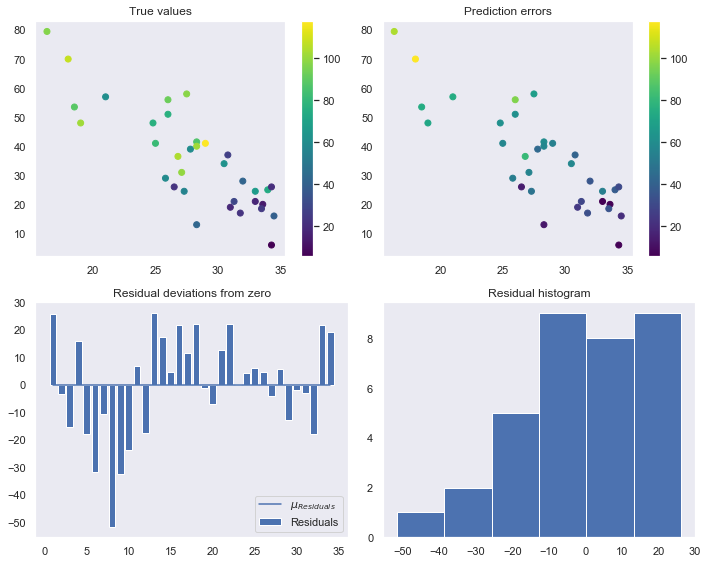

In [264]:
X = list(zip(x1,x2,np.sin(x1),np.sin(x2),np.sin(x1)*np.sin(x2)))
evaluate(X,y)

$R^2 \approx .6833$, eli tulos nousi jo jonkin verran. Yhdistettään vielä nämä kaksi jo kokeiltua asiaa, ihan vain kokeilun vuoksi. Tällöin 

$$ y_2 = \beta_0 + \beta_1x_1 + \beta_2x2 + \beta_3x_1^2 + \beta_4x_2^2 + \beta_5\sin{(x_1)} + \beta_6\sin{(x_2)} + \beta_7\sin{(x_1)}\sin{(x_2)}$$

Coefficients:[ 6.42737924e+00  2.88425505e+00 -1.22073257e-01 -1.66445558e-02
 -1.53726355e-01 -1.58693505e+00 -2.61982996e+01]
Intercept:-95.03446642674714
R^2: 0.7443626289909211


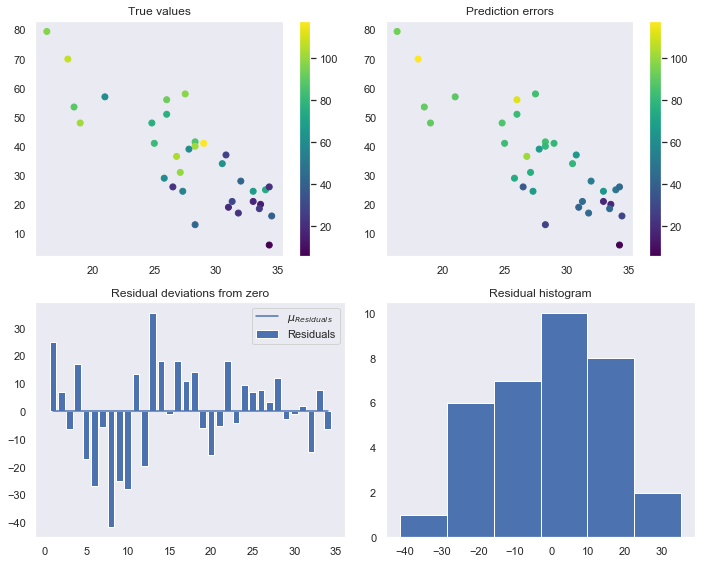

In [267]:
X = list(zip(x1,x2,x1**2,x2**2,np.sin(x1),np.sin(x2),np.sin(x1)*np.sin(x2)))
evaluate(X,y)

Tällä kehittelyllä $R^2 \approx .7443$, eli suunta paranee koko ajan. Samoin ennustetut arvot alkavat hajoamaan enemmän todellisten tapaan ja residuaalitkin ovat paljon enemmän normaalijakautuneet. Tästä voitaisiin siis päätellä, että mallia saataisiin edelleenkin paremmaksi, mikäli siihen lisättäisiin enemmän epälineaarisuutta mallintavia termejä.

## 14.7

> *Kommenntti: Tarkoitus on ilmeisesti ollut tehdä harjoitus 14.7, eikä 14.17 ...*
>
> **Vastaus**: Sisällön puolesta tehtävä näyttäisikin olevan tuo 14.7. Otsikoinnissa siis näyttäisi olevan virhe. Korjattu.

> *Kommentti: Minusta tässä olisi pitänyt tutkia mediaanien erotusta, eikä mediaaneja sinänsä. Vastaava esimerkki normaalijakautuneelle datalle on kirjassa Example 14.12. Tämän olisi voinut tehdä vertailukohteena.*
>
> **Vastaus**: Kuten tehtävän lomaan upotetuista komme

(14.5) The production manager of a large investment casting firm is studying different methods
to increase productivity in the workforce of the company. The process engineer and personnel in
the human resource department develop three new incentive plans (B, C, D) for which they will
design a study to compare the incentive plans with the current plan (plan A). Twenty workers are
randomly assigned to each of the four plans. The response variable is the total number of units
produced by each worker during one month on the incentive plans. The data are given here along
with the output from Minitab.

| Rep  | A     | B     | C     | D     |
|------|-------|-------|-------|-------|
| 1    | 422   | 521   | 437   | 582   |
| 2    | 431   | 545   | 422   | 639   |
| 3    | 784   | 600   | 473   | 735   |
| 4    | 711   | 406   | 478   | 800   |
| 5    | 641   | 563   | 397   | 853   |
| 6    | 709   | 361   | 944   | 748   |
| 7    | 344   | 387   | 394   | 622   |
| 8    | 599   | 700   | 890   | 514   |
| 9    | 511   | 348   | 488   | 714   |
| 10   | 381   | 944   | 521   | 627   |
| 11   | 349   | 545   | 387   | 548   |
| 12   | 387   | 337   | 633   | 644   |
| 13   | 394   | 427   | 627   | 736   |
| 14   | 621   | 771   | 444   | 528   |
| 15   | 328   | 752   | 1467  | 595   |
| 16   | 636   | 810   | 828   | 572   |
| 17   | 388   | 406   | 644   | 627   |
| 18   | 901   | 537   | 1154  | 546   |
| 19   | 394   | 816   | 430   | 701   |
| 20   | 350   | 369   | 508   | 664   |
| Mean | 514.1 | 557.2 | 628.3 | 649.8 |
| Std  | 171.8 | 184.4 | 290.2 | 93.1  |

Refer to Exercise 14.5. When the normality condition is violated, an alternative to the
F-test is the Kruskal–Wallis test (see Section 8.6).

**A. Test for differences in the median output of the four incentive plans. Use $\alpha = .05$**

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')

Tehtävän oli selvittää mediaanien eroja. Tätä varten hyödynnetään esimerkissä 14.12 esitettyä Tukeyn $W$-testiä:

$$ W = q_{\alpha}(t,v)\sqrt{\frac{s^2_w}{n}} $$

Testin laskentaan tarvitaan muutama komponentti. Ne saadaan viitatun tehtävän varianssianalyysitaulukosta.

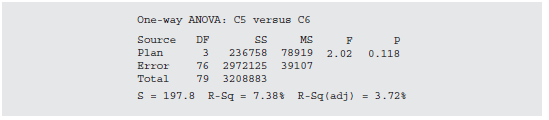

$$ t = 4 $$
$$ v = 76 $$
$$ s^2_w = 39107 $$
$$ n = 20 $$

Tällöin $W$-testin kaavaksi muodostuu siis

$$ W = q_{\alpha}(4,76)\sqrt{\frac{39107}{20}} $$

Ennenkuin testin arvo voidaan laskea, on käytävä taulukolla katsomassa oikea arvo $q$:lle.

$$ q_{\alpha}(4,76) = 3.7149 $$

Nyt meidän on mahdollista laskea $W$.

In [60]:
w = 3.7149*np.sqrt(39107/20)
w

164.27042490434332

$$ W = 164.270 $$

Seuraavaksi listataan suunnitelmakohtaiset mediaanit käyttäen B-kohdan tietoja.

$$ M_A = 426.8 $$
$$ M_B = 541 $$
$$ M_C = 497.8 $$
$$ M_D = 633.3 $$

In [90]:
populations = {
    'A':426.8,
    'C':497.8,
    'B':541,
    'D':633.3
}
medians_df = pd.DataFrame(index=populations.keys(), columns=populations.keys())

for source in populations:
    for target in populations:
        if populations[target] > populations[source]:
            medians_df.loc[source,target] = populations[target] - populations[source]

medians_df = medians_df.dropna(axis=0,how='all').dropna(axis=1,how='all').fillna(0)

print('"Sarakkeen mediaanit näin paljon rivin mediaania suurempia"')
medians_df

"Sarakkeen mediaanit näin paljon rivin mediaania suurempia"


,C,B,D
A,71.0,114.2,206.5
C,0.0,43.2,135.5
B,0.0,0.0,92.3


In [91]:
print('"Sarakkeen ja rivin mediaanien ero pienempi kuin W"')
medians_df < w

"Sarakkeen ja rivin mediaanien ero pienempi kuin W"


,C,B,D
A,True,True,False
C,True,True,True
B,True,True,True


Ylläoleva taulukko on muodostettu siten, että kunkin populaation mediaanin erotusta muihin mediaaneihin on verrattu laskettuun $W$-arvoon. Mikäli erotus on kyseistä arvoa pienempi (`True`), eivät mediaanit eroa merkittävästi toisistaan. Toisin sanoen matriisia luetaan seuraavasti:

- A-, C- ja B-populaatioilla ei havaita merkittävää eroa
- C-, B- ja D-populaatioilla ei havaita merkittävää eroa
- A-populaatio eroaa merkittävästi vain D-populaatiosta

Sama esitettynä kirjan tapaan:

```python
A  C  B  D
_______
   _______
```

**B. Verify the output from Minitab given above.**

Tehtävän helpottamiseksi testin tulokset tuotiin tähän.

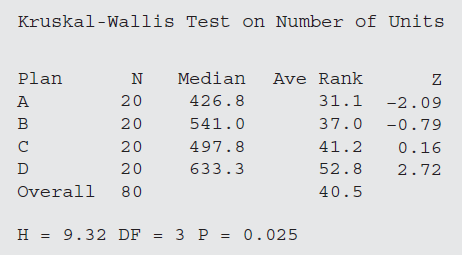

Kirjan seiskataulukosta lukien hylkäämisen rajana toimiva kriittinen arvo on 9.348, joka on erittäin lähellä $H_0$ (populaatiot identtiset) hylkäämisen rajaa muttei sitä kuitenkaan ylitä. KW-testin antama $p$-arvo on kuitenkin A-kohdan määritettyä $\alpha$-arvoa pienempi, jolloin perusteet hylätä nollahypoteesi ovat vahvemmat. Toisinsanoen populaatioissa on eroa.

**C. Why do you think the conclusions reached using the Kruskal–Wallis test differ from
the conclusions reached using the F-test from the AOV table?**

Varianssianalyysin nollahypoteesihän on, että populaatioiden keskiarvot eivät poikkea toisistaan. A-kohdassa esitetty tehtävän 14.5 varianssianalyysitaulukko antaa testin tulokseksi $p=.118$. Mikäli tässä kohdin käytettäisiin A-kohdan merkitsevyystasoa $\alpha=.05$, ei nollahypoteesiä F-testin perusteella voitaisi suoraan hylätä. 

## 15.04

Two devices have been proposed to reduce the air pollution resulting from the emission
of carbon monoxide (CO) from the exhaust of automobiles. To evaluate the effectiveness of the
devices, 48 cars of varying age and mechanical condition were selected for the study. The amount
of carbon monoxide in the exhaust (in ppm) was measured prior to installing the device on each
of the cars. Because there were considerable differences in the mechanical condition of the cars,
the cars were paired based on the level of CO in their exhaust. The two devices were then randomly
assigned to the cars within each pair of cars. Five months after installation, the amount of
CO in the exhaust was again measured on each of the cars. The reduction in carbon monoxide
from the initial measurements are given here.

| Pair   | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   | 17   | 18   | 19   | 20   | 21   | 22   | 23   | 24   |
|--------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|
| Before | 2.37 | 3.17 | 3.07 | 2.73 | 3.49 | 4.35 | 3.65 | 3.97 | 3.21 | 4.46 | 3.81 | 4.55 | 4.51 | 3.03 | 4.47 | 3.44 | 3.52 | 3.05 | 3.66 | 3.81 | 3.13 | 3.43 | 3.26 | 2.85 |
| After  | 2.51 | 2.65 | 2.60 | 2.40 | 2.31 | 2.28 | 0.94 | 2.21 | 3.29 | 1.92 | 3.38 | 2.43 | 1.83 | 2.63 | 2.31 | 1.85 | 2.92 | 2.26 | 3.11 | 1.90 | 2.50 | 3.18 | 3.24 | 2.16 |

**A. Does the device appear to reduce the average amount of CO in the exhaust of the
cars? Use $\alpha = .05$.**

Selvityksen kohteena on toisin sanoen se, että vaikuttavatko laitteet päästöihin autojen keskinäisiä eroja merkittävämmin. Koska autoja oli alun alkujaan 48 ja mittauksia varten autot paritettiin käyttö- ja kulumaominaisuuksiltaan samankaltaisten kanssa, ovat lukemat parhaiten ymmärrettävissä keskiarvoina kahden auton mittauksista. Koska laitteet asennettiin satunnaisesti autopareihin, täyttyy vaatimus lohkotun ja satunnaistetun tutkimuksen asetelmasta. 

Tämän tehtävän kohdalla testihypoteesit ovat

$$ H_0 : \mu_{\text{Before}} = \mu_{\text{After}} $$
$$ H_a : \mu_{\text{Before}} \ne \mu_{\text{After}} $$

Aloitetaan tuttuun tapaan, kirjastoilla ja datan kokoamisella.

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set(style='dark')
pd.options.display.float_format = "{:.3f}".format

In [131]:
before = [2.37,3.17,3.07,2.73,3.49,4.35,3.65,3.97,3.21,4.46,3.81,4.55,4.51,3.03,4.47,3.44,3.52,3.05,3.66,3.81,3.13,3.43,3.26,2.85]
after = [2.51,2.65,2.60,2.40,2.31,2.28,0.94,2.21,3.29,1.92,3.38,2.43,1.83,2.63,2.31,1.85,2.92,2.26,3.11,1.90,2.50,3.18,3.24,2.16]
samples = pd.DataFrame([before,after],index=['Before','After'])
samples.index.name = 'Samples'
samples

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Samples,,,,,,,,,,,,,,,,,,,,,
Before,2.370,3.170,3.070,2.730,3.490,4.350,3.650,3.970,3.210,4.460,...,4.470,3.440,3.520,3.050,3.660,3.810,3.130,3.430,3.260,2.850
After,2.510,2.650,2.600,2.400,2.310,2.280,0.940,2.210,3.290,1.920,...,2.310,1.850,2.920,2.260,3.110,1.900,2.500,3.180,3.240,2.160


Tehtävän pohjalta määritellään seuraavat muuttujat

$$ t = (t_{\text{Before}}, t_{\text{After}}) = 2$$
$$ b = 24 $$

Lasketaanpa seuraavaksi kullekin hoito-lohko-parille (ts. arvolle) sen odotusarvo $E(y_{ij})$. Tätä varten lasketaan hoidon ja lohkon vaikutuksia ilmaisevat muuttujat

$$ \mu = \mu_{tb} $$
$$ \text{Factor A}: \tau_i = \mu_{ib} - \mu $$
$$ \text{Factor B}: \beta_j = \mu_{tj} - \mu $$

Tavoitteena on laskea yksittäiset odotusarvot

$$ \mu_{ij} = \mu + \tau_i +\beta_j $$

In [151]:
t = 2
b = 24
mu = samples.mean().mean()
taus = samples.T.mean()-mu
betas = samples.mean()-mu

expected_values = pd.DataFrame(np.zeros((t,b)),index=['Before','After'])
expected_values.index.name = 'Expected values'
for t_i, (idx_name, test) in enumerate(expected_values.iterrows()):
    for b_i, item in row.items():
        expected_values.loc[idx_name, b_i] = mu + taus[t_i] + betas[b_i]
expected_values

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Expected values,,,,,,,,,,,,,,,,,,,,,
Before,2.985,3.455,3.380,3.110,3.445,3.860,2.840,3.635,3.795,3.735,...,3.935,3.190,3.765,3.200,3.930,3.400,3.360,3.850,3.795,3.050
After,1.895,2.365,2.290,2.020,2.355,2.770,1.750,2.545,2.705,2.645,...,2.845,2.100,2.675,2.110,2.840,2.310,2.270,2.760,2.705,1.960


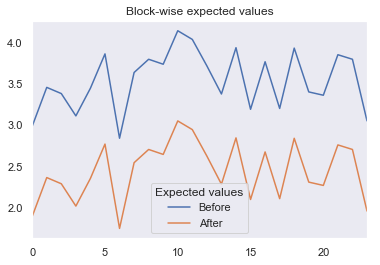

In [155]:
expected_values.T.plot()
plt.title('Block-wise expected values')
plt.show()

Odotusarvojen osalta ainakin näyttää siltä, että asennusten jälkeen olisi havaittavissa selkeää eroa. Jatketaanpa seuraavaksi varianssianalyysiin. Sitä varten on selvitettävä seuraavat suureet:

$$ \text{TSS} = \sum_{ij}(y_{ij}-\bar{y}_{..})^2 $$
$$ \text{SST} = b\sum_{i}(y_{i.}-\bar{y}_{..})^2 $$
$$ \text{SSB} = t\sum_{j}(y_{.j}-\bar{y}_{..})^2 $$


In [183]:
print(f"Lasketaan TSS {samples.size} havainnon keskiarvolla")
tss = samples.applymap(lambda y: (y-mu)**2).sum().sum()
print(f"Lasketaan SST {samples.T.mean().shape[0]} hoidolle")
sst = samples.T.mean().apply(lambda y: (y-mu)**2).sum()*b
print(f"Lasketaan SSB {samples.mean().shape[0]} hoidolle")
ssb = samples.mean().apply(lambda y: (y-mu)**2).sum()*t
sse = tss-sst-ssb
tss, sst, ssb, sse

Lasketaan TSS 48 havainnon keskiarvolla
Lasketaan SST 2 hoidolle
Lasketaan SSB 24 hoidolle


(30.045766666666665, 14.279008333333323, 5.904366666666666, 9.862391666666676)

$$ \text{TSS} = 30.05 $$
$$ \text{SST} = 14.28 $$
$$ \text{SSB} = 5.904 $$
$$ \text{SSE} = \text{TSS}-\text{SST}-\text{SSB} = 9.862$$

Tehtävässä käytettävät vapausasteet ovat 

$$ \text{df}_t = t-1 = 1 $$
$$ \text{df}_b = b-1 = 23 $$
$$ \text{df}_e = (\text{df}_t)(\text{df}_b) = 23 $$
$$ \text{df}_{\text{tot.}} = bt-1 = 47 $$


Lasketaan seuraavaksi neliöidyt keskivirheet.

In [185]:
df_t, df_b, df_e = 1, 23, 23
mst = sst/df_t
msb = ssb/df_b
mse = sse/df_e
mst, msb, mse

(14.279008333333323, 0.2567115942028985, 0.42879963768115986)

$$ \text{MST} = 14.28 $$
$$ \text{MSB} = .2567 $$
$$ \text{MSE} = .4288 $$


Näiden arvojen avulla on jo mahdollista selvittää hoito- ja lohkokohtaiset $F$-arvot.

In [186]:
f_t = mst/mse
f_b = msb/mse
f_t, f_b

(33.29995428762625, 0.5986749326355078)

$$ F_t = 33.30 $$
$$ F_b = .5987 $$

Koska meitä kiinnostaa ennenkaikkea hoitojen eli kontrolliarvojen ja laitteen asennusten jälkeisten arvojen erojen merkitsevyys, tutkaillaan nollahypoteesin hylkäämistä $F_t$:n avulla. Koska tehtävässä määritetty $\alpha =.05$, on kirjan taulukossa vapausasteita vastaava kriittinen raja

$$ F_{.05, 1, 23} = 4.28 \ll 33.30 $$

Tämän tuloksen $p$-arvoksi saadaan haarukoimalla $F_t$-arvon sisällään pitävä $\alpha$-arvon raja taulukosta. Sieltä lukien

$$ p \ll .001, \text{ koska } F_{.001,1,23} = 14.03 $$

Pieni $p$-arvo tarkoittaa merkittävää tukea tutkimuksen tulokselle.

**B. Compute the relative efficiency of the randomized complete block design (blocking
on car) relative to a completely randomized design in which the 48 cars would have
been randomly assigned to the two devices without regard to any pairing. Interpret
the value of the relative efficiency.**

Seuraavaksi on tehtävänä selvittää lohkomisen vaikutusta tutkimusasetelmaan. Ajatuksena on pohjimmiltaan selvittää, että saavutettiinko lohkomisella havaintokohtainen pienempi vaihtelu verrattuna täysin satunnaistettuun tutkimusasetelmaan. Suhteellinen tehokkuus lasketaan kaavalla

$$ \text{RE}(\text{RCB},\text{CR}) = \frac{\text{MSE}_{\text{CR}}}{\text{MSE}_{\text{RCB}}} $$
$$ \text{MSE}_{\text{CR}} = (b-1)\text{MSB}+b(t-1)\text{MSE} $$
$$ \text{MSE}_{\text{RCB}} = (bt-1)\text{MSE} $$

Jotta lohkottu asetelma olisi tehokkaampi, tulisi suhdeluvun olla suuri. Tällöin satunnaistetussa asetelmassa tarvittaisiin enemmän havaintoja saman tarkkuuden saamiseen.

In [188]:
mse_cr = (b-1)*msb+(b*(t-1))*mse
mse_rcb = (b*t-1)*mse
re = mse_cr/mse_rcb
re

0.8036068819280143

$$ \text{RE}(\text{RCB},\text{CR}) = .8036 $$

Suhdeluku on pieni, jotenka lohkominen ei tehostanut vertailua.

**C. Based on the relative efficiency computed in part (b), would you recommend pairing
the cars in future studies?**

Tätä ei voida suositella.